#Installing Required Libraries#

In [165]:
!pip install watermark
!pip install pmdarima
!pip install folium
!pip install geopandas
!pip install contextily

In [166]:
# Import of libraries

# System libraries
import re
import string
import unicodedata
import itertools
from collections import Counter

# Library for file manipulation
import pandas as pd
import numpy as np
import pandas

# Data visualization
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt

# Time Series
import pmdarima as pm
from prophet import Prophet
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Configuration for graph width and layout
sns.set_theme(style='whitegrid')
palette='viridis'

# Warnings remove alerts
import warnings
warnings.filterwarnings("ignore")

# Python version
from platform import python_version
print('Python version in this Jupyter Notebook:', python_version())

# Load library versions
import watermark

# Library versions
%reload_ext watermark
%watermark -a "Library versions" --iversions

Python version in this Jupyter Notebook: 3.10.12
Author: Library versions

re         : 2.2.1
scipy      : 1.13.1
lightgbm   : 4.5.0
pmdarima   : 2.0.4
numpy      : 1.26.4
plotly     : 5.24.1
matplotlib : 3.8.0
prophet    : 1.1.6
platform   : 1.0.8
xgboost    : 2.1.3
sklearn    : 1.5.2
statsmodels: 0.14.4
watermark  : 2.5.0
seaborn    : 0.13.2
pandas     : 2.2.2



#Loading Data#

In [167]:
data_1 = pd.read_csv('/content/GlobalLandTemperaturesByCity.csv')
data_2 = pd.read_csv('/content/GlobalLandTemperaturesByCountry.csv')
data_3 = pd.read_csv('/content/GlobalLandTemperaturesByState.csv')
data_4 = pd.read_csv('/content/GlobalLandTemperaturesByMajorCity.csv')
data_5 = pd.read_csv('/content/GlobalTemperatures.csv')

In [168]:
data_1.head()

dt  AverageTemperature  AverageTemperatureUncertainty   City  \
0  1743-11-01               6.068                          1.737  Århus   
1  1743-12-01                 NaN                            NaN  Århus   
2  1744-01-01                 NaN                            NaN  Århus   
3  1744-02-01                 NaN                            NaN  Århus   
4  1744-03-01                 NaN                            NaN  Århus   

   Country Latitude Longitude  
0  Denmark   57.05N    10.33E  
1  Denmark   57.05N    10.33E  
2  Denmark   57.05N    10.33E  
3  Denmark   57.05N    10.33E  
4  Denmark   57.05N    10.33E

In [169]:
data_1.shape

(3688157, 7)

In [170]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3688157 entries, 0 to 3688156
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 197.0+ MB


In [171]:
data_1.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object

In [172]:
# Converting the 'dt' column to datetime format
data_1['dt'] = pd.to_datetime(data_1['dt'], infer_datetime_format=True, errors='coerce')

In [173]:
df_country = pd.read_csv('/content/GlobalLandTemperaturesByCountry.csv')

#Data Cleaning#

In [174]:
# Check for missing values in each column data 1
missing_values = data_1.isnull().sum()
print("Missing values per column in the dataset - data_1:\n", missing_values)
print()
# Check for missing values in each column data 2
missing_values = df_country.isnull().sum()
print("Missing values per column in the dataset - data 2:\n", missing_values)
print()
# Check for missing values in each column data 3
missing_values = data_3.isnull().sum()
print("Missing values per column in the dataset - data 3:\n", missing_values)
print()
# Check for missing values in each column data 4
data_4 = data_4.dropna(subset=['AverageTemperature', 'AverageTemperatureUncertainty'])
missing_values = data_4.isnull().sum()
print("Missing values per column in the dataset - data 4:\n", missing_values)
print()
# Check for missing values in each column data 5
missing_values = data_5.isnull().sum()
print("Missing values per column in the dataset - data 5:\n", missing_values)

Missing values per column in the dataset - data_1:
 dt                                    0
AverageTemperature               160055
AverageTemperatureUncertainty    160056
City                                  1
Country                               1
Latitude                              1
Longitude                             1
dtype: int64

Missing values per column in the dataset - data 2:
 dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

Missing values per column in the dataset - data 3:
 dt                                   0
AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country                              0
dtype: int64

Missing values per column in the dataset - data 4:
 dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City          

In [175]:
data_1 = data_1.dropna(subset=['AverageTemperature', 'AverageTemperatureUncertainty'])
missing_values = data_1.isnull().sum()
print("Missing values per column in the dataset - data_1:\n", missing_values)
print()

# Remove rows with missing values in the main temperature columns for data 2
df_country = df_country.dropna(subset=['AverageTemperature', 'AverageTemperatureUncertainty'])
missing_values = df_country.isnull().sum()
print("Missing values per column in the dataset - data_2:\n", missing_values)
print()

# Remove rows with missing values in the main temperature columns for data 3
data_3 = data_3.dropna(subset=['AverageTemperature', 'AverageTemperatureUncertainty'])
missing_values = data_3.isnull().sum()
print("Missing values per column in the dataset - data_3:\n", missing_values)
print()

# Remove rows with missing values in the main temperature columns for data 4
data_4 = data_4.dropna(subset=['AverageTemperature', 'AverageTemperatureUncertainty'])
missing_values = data_4.isnull().sum()
print("Missing values per column in the dataset - data_4:\n", missing_values)
print()

# with missing values in the main temperature columns for data 5
data_5 = data_5.dropna(subset=['LandAverageTemperature', 'LandAverageTemperatureUncertainty', 'LandMaxTemperature',
                              'LandMaxTemperatureUncertainty', 'LandMinTemperature', 'LandMinTemperatureUncertainty',
                              'LandAndOceanAverageTemperature', 'LandAndOceanAverageTemperatureUncertainty'])
missing_values = data_5.isnull().sum()
print("Missing values per column in the dataset - data_5:\n", missing_values)

Missing values per column in the dataset - data_1:
 dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

Missing values per column in the dataset - data_2:
 dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64

Missing values per column in the dataset - data_3:
 dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
State                            0
Country                          0
dtype: int64

Missing values per column in the dataset - data_4:
 dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude       

In [176]:
# Database
data_home2 = pd.read_csv("/content/GlobalTemperatures.csv")

# Convert the 'dt' column to datetime format
data_home2['dt'] = pd.to_datetime(data_home2['dt'])

# Extract the year from the 'dt' column
data_home2['Year'] = data_home2['dt'].dt.year

#Global Average Temperature Trends with Uncertainty and Moving Average#

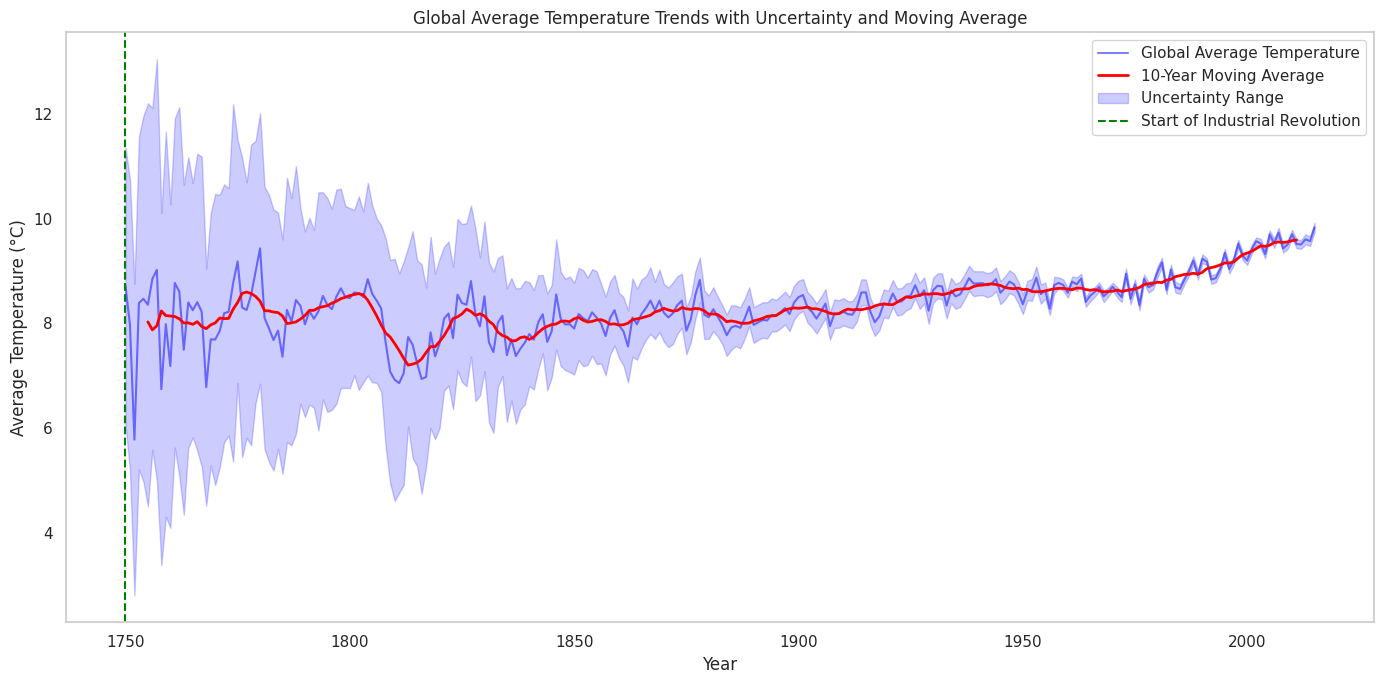

In [177]:
# Group by year and calculate the average temperature for each year
annual_avg_temp = data_home2.groupby('Year')['LandAverageTemperature'].mean()
annual_temp_uncertainty = data_home2.groupby('Year')['LandAverageTemperatureUncertainty'].mean()

# Apply a moving average to smooth fluctuations
smoothed_temp = annual_avg_temp.rolling(window=10, center=True).mean()

# Plotting
plt.figure(figsize=(14, 7))

# Original data
plt.plot(annual_avg_temp, label='Global Average Temperature', color='blue', alpha=0.5)

# Smoothed data
plt.plot(smoothed_temp, label='10-Year Moving Average', color='red', linewidth=2)
# Add uncertainty as a shaded area
plt.fill_between(
    annual_avg_temp.index,
    annual_avg_temp - annual_temp_uncertainty,
    annual_avg_temp + annual_temp_uncertainty,
    color='blue',
    alpha=0.2,
    label='Uncertainty Range'
)

# Highlight specific periods (e.g., Industrial Revolution start)
plt.axvline(x=1750, color='green', linestyle='--', label='Start of Industrial Revolution')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.title('Global Average Temperature Trends with Uncertainty and Moving Average')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Save and show the plot
plt.tight_layout()
plt.savefig('enhanced_temperature_trends.png')
plt.grid(False)
plt.show()


Here's a long-term view of global average temperature trends, illustrating how temperatures have changed over the past 250 years. The blue line represents the global average temperature, which shows an overall upward trend since the start of the Industrial Revolution, marked by the green vertical line. The red line indicates the 10-year moving average, highlighting the long-term warming pattern. The gray shading represents the uncertainty range, reflecting the natural variability in temperature measurements. The chart demonstrates that while there have been fluctuations, with both warm and cool periods, the global average temperature has been rising over the centuries, correlating with the onset of industrialization. This visualization gives a comprehensive perspective on the complex climate dynamics that have unfolded over the past two and a half centuries.

In [178]:
# Convert 'dt' column to datetime format and extract the year
df_country['dt'] = pd.to_datetime(df_country['dt'])
df_country['Year'] = df_country['dt'].dt.year

# Remove rows with missing temperature values
df_country = df_country.dropna(subset=['AverageTemperature'])

# Calculate annual average temperature by country
annual_avg_temp_country = df_country.groupby(['Country', 'Year'])['AverageTemperature'].mean().reset_index()

# Filter specific countries for analysis
selected_countries = ['United States', 'Brazil', 'China', 'India', 'Australia']
filtered_data = annual_avg_temp_country[annual_avg_temp_country['Country'].isin(selected_countries)]
filtered_data.head(n=20)

Country  Year  AverageTemperature
2475  Australia  1852           20.188500
2476  Australia  1853           20.958250
2477  Australia  1854           20.284778
2478  Australia  1855           20.798636
2479  Australia  1856           21.148333
2480  Australia  1857           20.966417
2481  Australia  1858           21.329833
2482  Australia  1859           21.188917
2483  Australia  1860           21.245500
2484  Australia  1861           21.197500
2485  Australia  1862           21.155417
2486  Australia  1863           21.309000
2487  Australia  1864           21.044250
2488  Australia  1865           21.217833
2489  Australia  1866           21.417000
2490  Australia  1867           21.643833
2491  Australia  1868           21.447583
2492  Australia  1869           21.521583
2493  Australia  1870           21.428333
2494  Australia  1871           21.459667

#Historical Temperature Trends Across Selected Countries

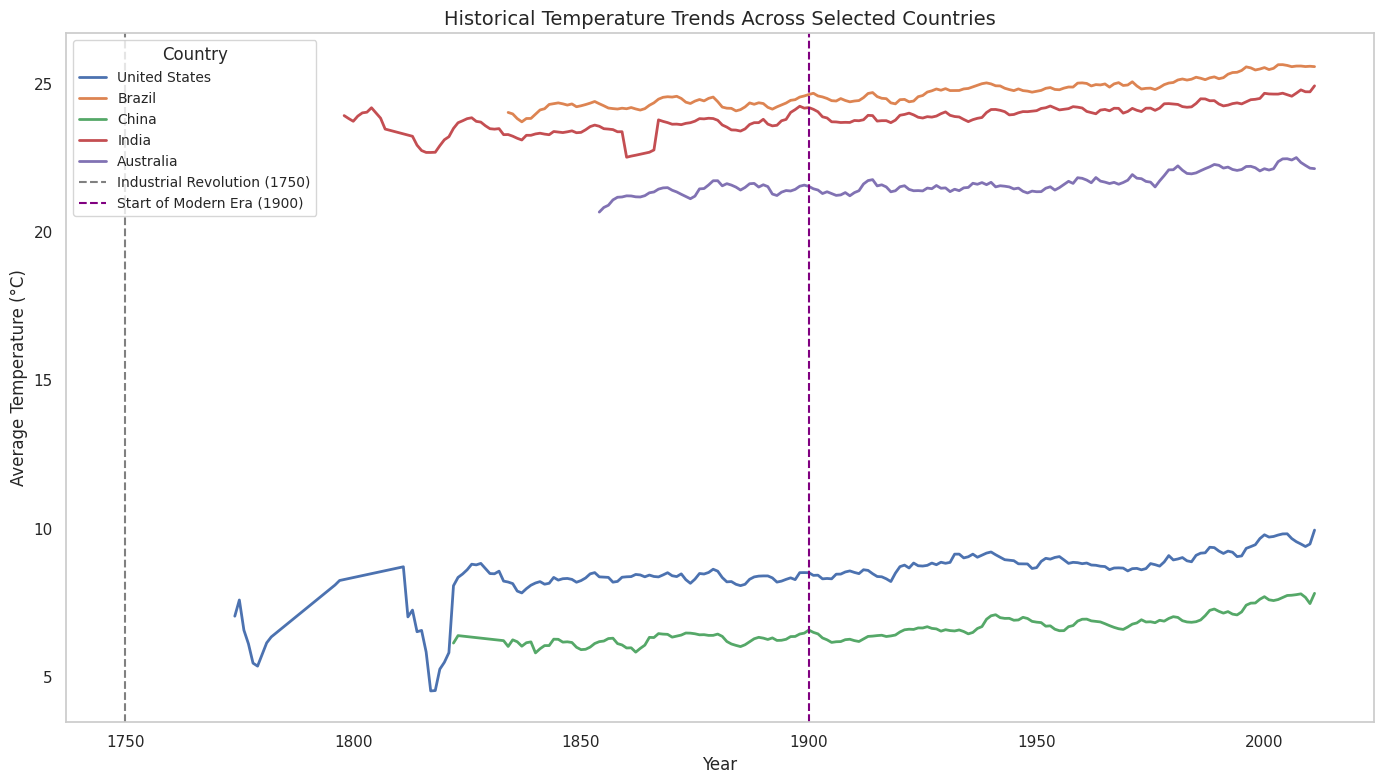

In [179]:
# Enhanced visualization of temperature trends with improvements
plt.figure(figsize=(14, 8))

# Applying a moving average for smoothing (e.g., 5-year window)
for country in selected_countries:
    country_data = filtered_data[filtered_data['Country'] == country]
    smoothed_temp = country_data['AverageTemperature'].rolling(window=5, center=True).mean()
    plt.plot(country_data['Year'], smoothed_temp, label=country, linewidth=2)

# Adding annotations for key historical events
plt.axvline(x=1750, color='gray', linestyle='--', label='Industrial Revolution (1750)')
plt.axvline(x=1900, color='purple', linestyle='--', label='Start of Modern Era (1900)')

# Customizing title, labels, and legend
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.title('Historical Temperature Trends Across Selected Countries', fontsize=14)
plt.legend(title="Country", fontsize=10, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)

# Adding a more distinct color palette
plt.tight_layout()
plt.grid(False)
plt.show()

 it is clear that there is significant variation in the temperature trends between the different countries. While they all generally exhibit an upward trajectory, the specific patterns and magnitudes of change differ notably. The United States, for instance, shows the most pronounced warming trend, with temperatures rising steadily over the past century. In contrast, China and India display more moderate warming trends, with some periods of temperature fluctuations. Brazil and Australia have relatively less pronounced temperature increases compared to the other countries shown.

 The timing of major historical events, such as the Industrial Revolution in 1750 and the start of the Modern Era in 1900, are marked with vertical lines, suggesting that these pivotal moments may have influenced the observed temperature changes to some degree. The divergence in temperature trends between the countries also indicates that regional factors, in addition to global climate patterns, play an important role in shaping local temperature dynamics.

In [180]:
correlations = {}
for country in selected_countries:
    country_data = annual_avg_temp_country[annual_avg_temp_country['Country'] == country]
    correlation = country_data['Year'].corr(country_data['AverageTemperature'])
    correlations[country] = correlation

print("Correlation between Year and Average Temperature:")
for country, corr_value in correlations.items():
    print(f"{country}: {corr_value:.2f}")

Correlation between Year and Average Temperature:
United States: 0.49
Brazil: 0.85
China: 0.74
India: 0.59
Australia: 0.66


**Correlation between rising temperatures and specific regions:**
we can see how the temperature trends have unfolded over time in each of the selected countries - United States, Brazil, China, India, and Australia.
Brazil stands out as having the strongest positive correlation at 0.85. This suggests that in Brazil, as the years have progressed, temperatures have tended to increase in a fairly linear fashion.
China also exhibits a relatively high positive correlation of 0.74, indicating a moderately strong link between time and increasing temperatures.
India, Australia, and the United States show weaker, but still positive, correlations of 0.59, 0.66, and 0.49 respectively. This implies that while temperatures have trended upwards over time in these countries, the relationship is not as strongly linear as in Brazil and China.

In [181]:
df_country['dt'] = pd.to_datetime(df_country['dt'])
df_country['Year'] = df_country['dt'].dt.year

# Remove data with missing temperatures
df_country = df_country.dropna(subset=['AverageTemperature'])

# Filter for the last decades
recent_data = df_country[df_country['Year'] >= 1980]

# Calculate the annual average temperature by country
annual_avg_temp_country = recent_data.groupby(['Country', 'Year'])['AverageTemperature'].mean().reset_index()

# Calculate the rate of temperature change for each country
# To do this, calculate the slope of the trend line for each country
temperature_trends = {}

for country in annual_avg_temp_country['Country'].unique():
    country_data = annual_avg_temp_country[annual_avg_temp_country['Country'] == country]
    if len(country_data) > 1:  # Ensure there is enough data for the calculation
        # Calculate the rate of change based on linear regression
        slope = (country_data['AverageTemperature'].iloc[-1] - country_data['AverageTemperature'].iloc[0]) / (country_data['Year'].iloc[-1] - country_data['Year'].iloc[0])
        temperature_trends[country] = slope

# Sort the countries by the highest rate of temperature increase
sorted_trends = sorted(temperature_trends.items(), key=lambda x: x[1], reverse=True)
annual_avg_temp_country

Country  Year  AverageTemperature
0     Afghanistan  1980           14.887333
1     Afghanistan  1981           14.860083
2     Afghanistan  1982           13.733083
3     Afghanistan  1983           14.614833
4     Afghanistan  1984           14.245833
...           ...   ...                 ...
8223        Åland  2009            6.489083
8224        Åland  2010            4.861917
8225        Åland  2011            7.170750
8226        Åland  2012            6.063917
8227        Åland  2013            6.229750

[8228 rows x 3 columns]

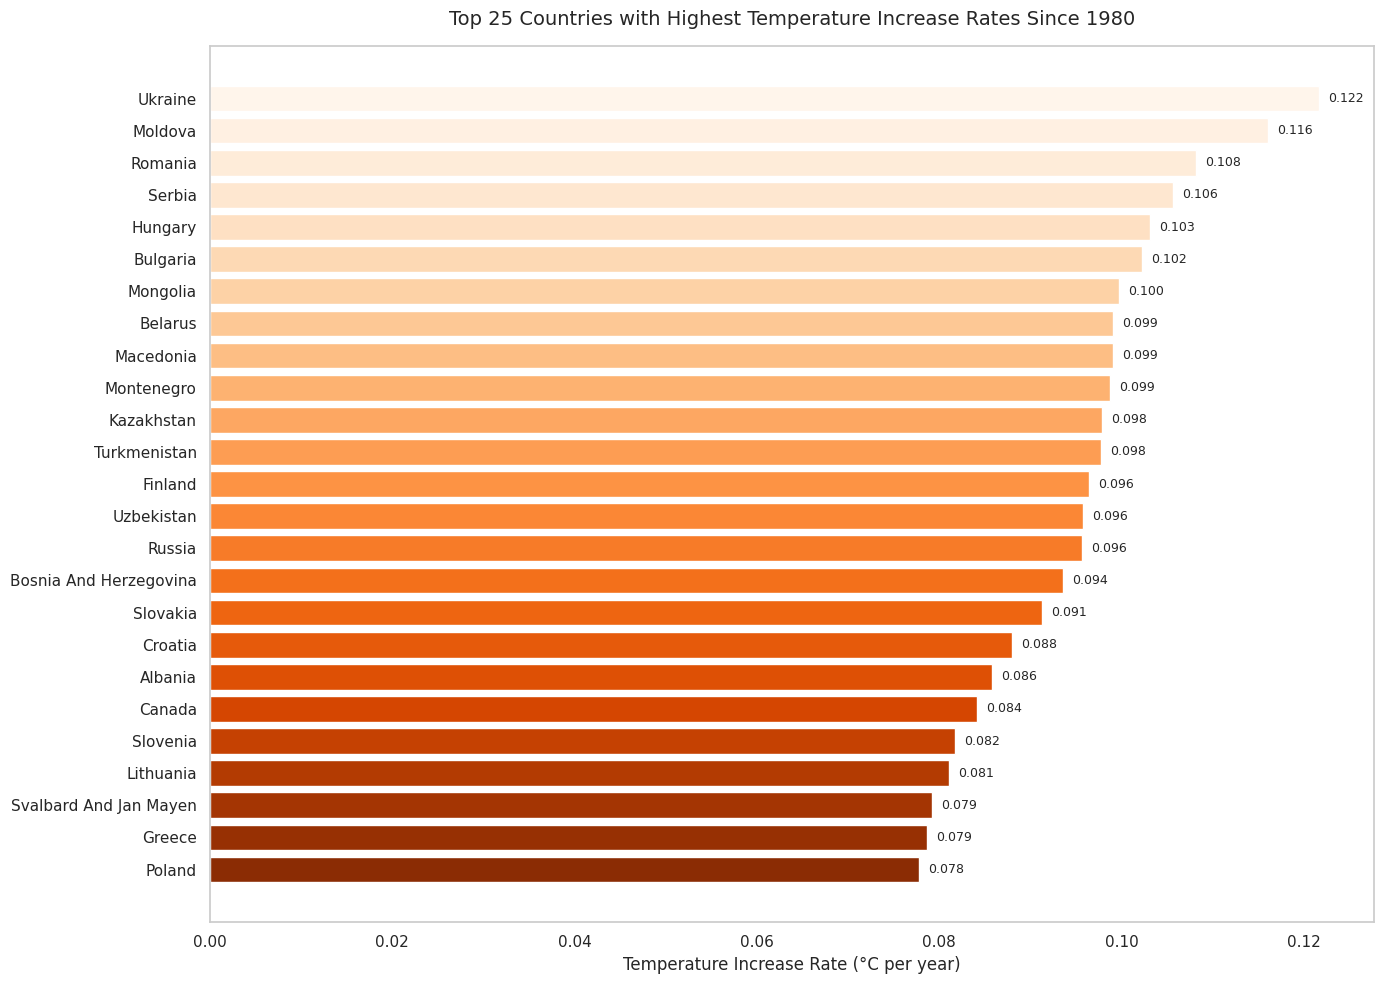

In [182]:
# Improved visualization with enhancements

# Selecting the top 25 countries with the highest temperature increase rates
top_countries = sorted_trends[:25]
countries = [country for country, trend in top_countries]
trends = [trend for country, trend in top_countries]

plt.figure(figsize=(14, 10))

# Use a color gradient
colors = plt.cm.Oranges([i / len(countries) for i in range(len(countries))])
bars = plt.barh(countries, trends, color=colors)

# Add exact values at the end of each bar
for bar, trend in zip(bars, trends):
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height() / 2,
             f'{trend:.3f}', va='center', fontsize=9)

# Enhancing labels and title
plt.xlabel('Temperature Increase Rate (°C per year)', fontsize=12)
plt.title('Top 25 Countries with Highest Temperature Increase Rates Since 1980', fontsize=14, pad=15)

# Adding grid lines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Invert the y-axis for better readability
plt.gca().invert_yaxis()

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.grid(False)
plt.show()

Here is a clear visualization of the top 25 countries that have experienced the highest rates of temperature increase since 1980. This data provides valuable insights into the uneven impacts of global climate change across different regions of the world.

At the top of the list, Ukraine, Moldova, and Romania stand out with the most dramatic temperature increase rates, all exceeding 0.10°C per year. This is particularly notable, as these Eastern European nations appear to be among the regions most severely affected by rising temperatures in recent decades.

Neighboring countries in Eastern Europe and the former Soviet bloc, including Serbia, Hungary, Bulgaria, and Mongolia, also feature prominently on the list, all exhibiting temperature increase rates above 0.10°C annually. This regional clustering suggests that certain geographical and political factors may be contributing to the accelerated warming observed in this part of the world.
Interestingly, the data also indicates that countries located in colder climates or higher latitudes, such as Finland, Russia, and the Svalbard and Jan Mayen region, are experiencing relatively rapid temperature increases. This trend underscores the complex and multifaceted nature of global climate change, with some of the most pronounced impacts occurring in areas that are traditionally associated with cooler temperatures.

While the Eastern European nations dominate the top of the list, Western European countries like Slovenia, Lithuania, and Greece also show relatively high temperature increase rates, though not quite as extreme as their Eastern counterparts. Canada and Poland are the only North American and Western European countries to make it into the top 25, with increase rates of around 0.08°C per year.

# Relationship between temperature and uncertainty variables over time

<Figure size 1400x600 with 0 Axes>

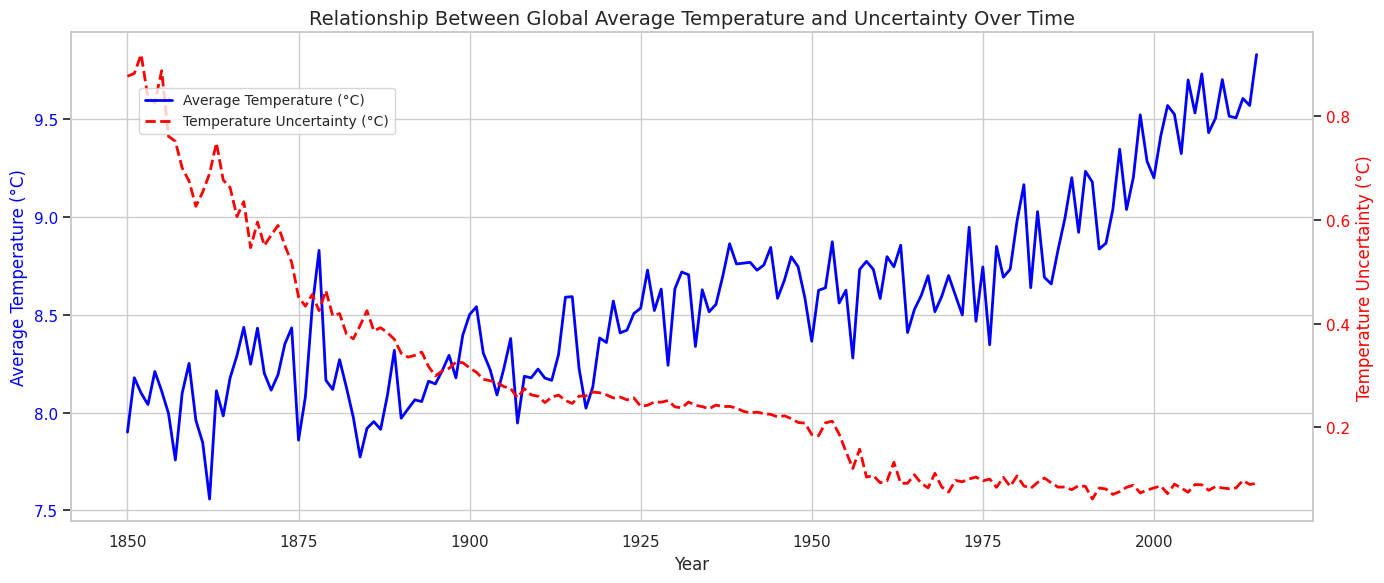

In [183]:
# Convert 'dt' column to datetime format and extract the year
data_5['dt'] = pd.to_datetime(data_5['dt'])
data_5['Year'] = data_5['dt'].dt.year

# Remove rows with missing values in temperature and uncertainty
data_5 = data_5.dropna(subset=['LandAverageTemperature', 'LandAverageTemperatureUncertainty'])

# Group by year to calculate annual average temperature and uncertainty
annual_data = data_5.groupby('Year')[['LandAverageTemperature', 'LandAverageTemperatureUncertainty']].mean().reset_index()

# Enhanced visualization of the relationship between temperature and uncertainty
plt.figure(figsize=(14, 6))

# Plot temperature on the primary axis
fig, ax1 = plt.subplots(figsize=(14, 6))
ax1.plot(annual_data['Year'], annual_data['LandAverageTemperature'], label='Average Temperature (°C)', color='blue', linewidth=2)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Average Temperature (°C)', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')

# Add a secondary axis for uncertainty
ax2 = ax1.twinx()
ax2.plot(annual_data['Year'], annual_data['LandAverageTemperatureUncertainty'], label='Temperature Uncertainty (°C)', color='red', linestyle='--', linewidth=2)
ax2.set_ylabel('Temperature Uncertainty (°C)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Add a title and improve the legend
plt.title('Relationship Between Global Average Temperature and Uncertainty Over Time', fontsize=14)
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.85), fontsize=10)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.grid(False)
plt.show()

The image presents a compelling visualization of the relationship between global average temperature and temperature uncertainty over time, revealing several important insights.

Firstly, the blue line depicting the global average temperature shows significant fluctuations, with both warming and cooling periods, but an overall upward trend is evident, indicating that temperatures have been rising steadily since 1850. Meanwhile, the red line representing temperature uncertainty demonstrates a noteworthy decrease over the same period, from a high of around 0.8°C in the late 19th century to a low of 0.2°C in the present day. This suggests that our ability to accurately measure and understand global temperatures has improved considerably.

Interestingly, an inverse relationship appears to exist between the global average temperature and temperature uncertainty. When temperatures are higher, the uncertainty tends to be lower, and vice versa, implying that more stable climatic conditions are associated with greater measurement precision. The data also exhibits pronounced short-term variations, underscoring the complex and dynamic nature of global climate patterns, which are influenced by a myriad of natural and human-induced factors.
Despite these short-term fluctuations, the overarching long-term trend points to a gradual increase in global average temperature, accompanied by a decrease in temperature uncertainty. This observation highlights the growing robustness of our understanding of climate change, even as challenges and uncertainties remain. Overall, this visualization provides a comprehensive perspective on the historical relationship between these two critical climate indicators, offering valuable insights for further research and policymaking.

In [184]:
correlation = annual_data['LandAverageTemperature'].corr(annual_data['LandAverageTemperatureUncertainty'])
print(f'Correlation between Average Temperature and Uncertainty: {correlation:.2f}')

Correlation between Average Temperature and Uncertainty: -0.68


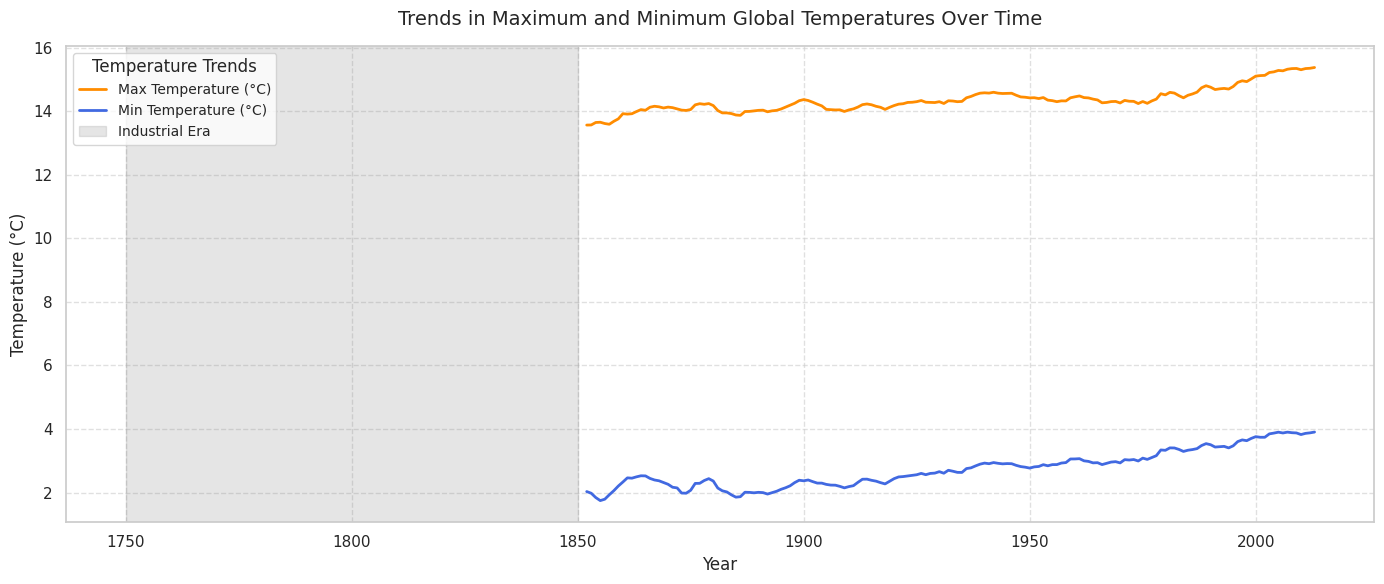

In [185]:
# Convert 'dt' column to datetime format and extract the year
data_5['dt'] = pd.to_datetime(data_5['dt'])
data_5['Year'] = data_5['dt'].dt.year

# Remove rows with missing values in max and min temperatures
data_5 = data_5.dropna(subset=['LandMaxTemperature', 'LandMinTemperature'])

# Group by year to calculate annual average max and min temperatures
annual_temp = data_5.groupby('Year')[['LandMaxTemperature', 'LandMinTemperature']].mean().reset_index()

# Enhanced visualization with suggested improvements
plt.figure(figsize=(14, 6))

# Apply a moving average for smoothing (e.g., 5-year window)
smoothed_max_temp = annual_temp['LandMaxTemperature'].rolling(window=5, center=True).mean()
smoothed_min_temp = annual_temp['LandMinTemperature'].rolling(window=5, center=True).mean()

# Plot max and min temperatures with smoothing
plt.plot(annual_temp['Year'], smoothed_max_temp, label='Max Temperature (°C)', color='darkorange', linewidth=2)
plt.plot(annual_temp['Year'], smoothed_min_temp, label='Min Temperature (°C)', color='royalblue', linewidth=2)

# Highlight specific periods (e.g., Industrial Era)
plt.axvspan(1750, 1850, color='gray', alpha=0.2, label='Industrial Era')

# Add labels, title, and legend
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.title('Trends in Maximum and Minimum Global Temperatures Over Time', fontsize=14, pad=15)
plt.legend(title="Temperature Trends", fontsize=10, loc='upper left')

# Add grid lines and improve aesthetics
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()

The graph highlights the trends in global maximum and minimum temperatures over time, with a clear distinction between the pre-industrial and industrial eras. The pre-industrial period, represented by the unshaded portion, shows relatively stable temperature patterns for both maximum and minimum values, reflecting a consistent climate with minimal variations. However, following the onset of the industrial era (shaded gray area), there is a noticeable upward trend in both maximum and minimum temperatures. The increase becomes more pronounced in recent decades, especially for minimum temperatures, which exhibit a steeper rise compared to earlier periods. This acceleration aligns with the widespread industrial activities, fossil fuel usage, and greenhouse gas emissions characteristic of the industrial era, emphasizing the human influence on global warming. The graph underscores the dramatic shift in temperature trends post-industrialization, highlighting the ongoing impact of anthropogenic factors on the Earth's climate system.

In [186]:
# Calculate the annual rate of change for maximum and minimum temperatures
annual_temp['MaxTempChange'] = annual_temp['LandMaxTemperature'].diff()
annual_temp['MinTempChange'] = annual_temp['LandMinTemperature'].diff()

# Calculate the percentage of years with a positive increase in max and min temperatures
max_increase_percentage = (annual_temp['MaxTempChange'] > 0).mean() * 100
min_increase_percentage = (annual_temp['MinTempChange'] > 0).mean() * 100

print(f'Percentage of years with increase in Max Temperature: {max_increase_percentage:.2f}%')
print(f'Percentage of years with increase in Min Temperature: {min_increase_percentage:.2f}%')

Percentage of years with increase in Max Temperature: 57.23%
Percentage of years with increase in Min Temperature: 55.42%


#Countries with Highest Average Temperature Uncertainty Over Time

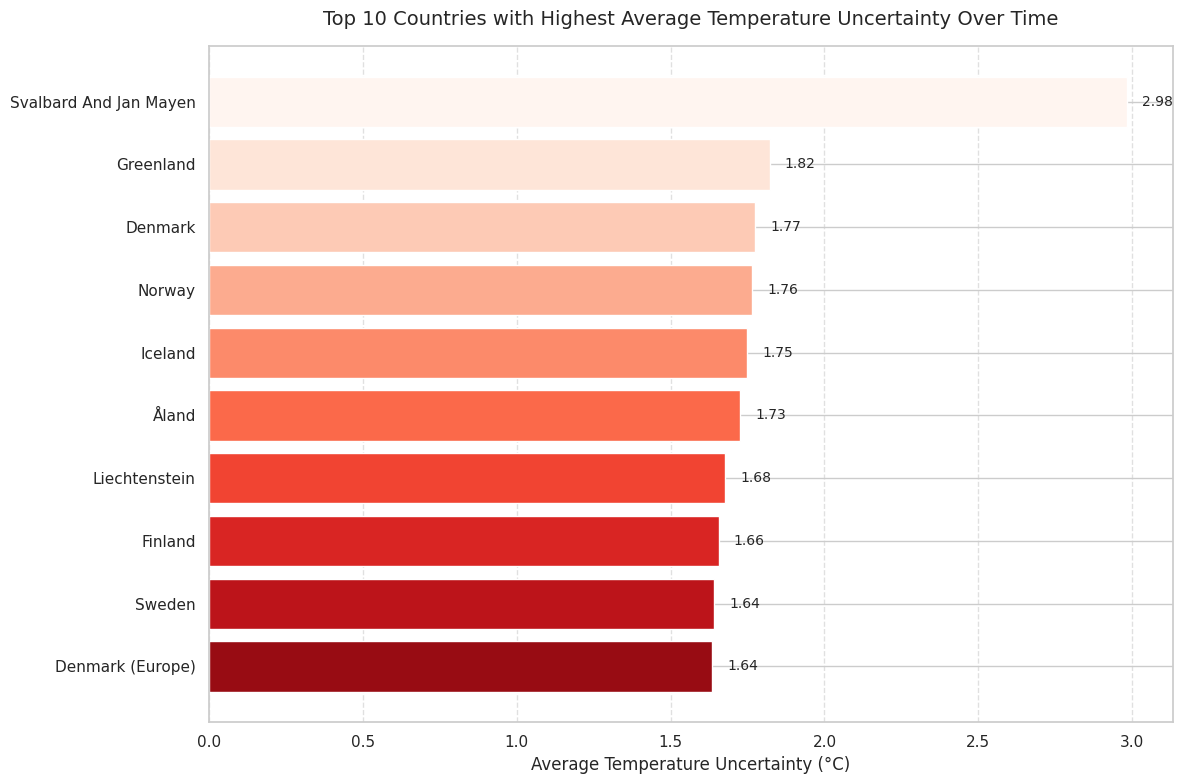

Country
Svalbard And Jan Mayen    2.982169
Greenland                 1.821422
Denmark                   1.772881
Norway                    1.763899
Iceland                   1.747089
Åland                     1.726378
Liechtenstein             1.675850
Finland                   1.655766
Sweden                    1.641920
Denmark (Europe)          1.635076
Name: AverageTemperatureUncertainty, dtype: float64

In [187]:
# Convert 'dt' column to datetime format and extract the year
df_country['dt'] = pd.to_datetime(df_country['dt'])
df_country['Year'] = df_country['dt'].dt.year

# Remove rows with missing uncertainty values
df_country = df_country.dropna(subset=['AverageTemperatureUncertainty'])

# Calculate annual average uncertainty by country
annual_uncertainty_country = df_country.groupby(['Country', 'Year'])['AverageTemperatureUncertainty'].mean().reset_index()

# Identify the 10 countries with the highest average uncertainty over the period
top_uncertainty_countries = (annual_uncertainty_country.groupby('Country')['AverageTemperatureUncertainty'].mean().nlargest(10))

# Improved visualization of countries with the highest temperature uncertainty
plt.figure(figsize=(12, 8))

# Use color gradients
colors = plt.cm.Reds([i / len(top_uncertainty_countries) for i in range(len(top_uncertainty_countries))])

# Plot horizontal bar chart
bars = plt.barh(top_uncertainty_countries.index, top_uncertainty_countries.values, color=colors)

# Add exact values at the end of each bar
for bar, value in zip(bars, top_uncertainty_countries.values):
    plt.text(value + 0.05, bar.get_y() + bar.get_height() / 2, f'{value:.2f}', va='center', fontsize=10)

# Add labels and title
plt.xlabel('Average Temperature Uncertainty (°C)', fontsize=12)
plt.title('Top 10 Countries with Highest Average Temperature Uncertainty Over Time', fontsize=14, pad=15)

# Add a grid for better comparison
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Invert y-axis for better readability
plt.gca().invert_yaxis()

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

top_uncertainty_countries

The bar chart highlights the top 10 countries and regions with the highest average temperature uncertainty over time, with Svalbard and Jan Mayen leading at 2.98°C, significantly higher than the others. Greenland follows with 1.82°C, reflecting the challenges of temperature measurement in Arctic and icy terrains with limited monitoring infrastructure. The list is dominated by Nordic countries and regions, including Denmark, Norway, Iceland, Finland, Sweden, and Åland, with uncertainties ranging from 1.64°C to 1.77°C, indicating a trend of higher uncertainty in colder, high-latitude areas. Liechtenstein also appears on the list, with an uncertainty of 1.68°C, likely influenced by its mountainous geography. The pattern underscores the persistent challenges of climate monitoring in remote and extreme environments, where harsh conditions, sparse data, and natural variability contribute to measurement uncertainties.

#Global Temperature Difference Between Land and Land-Ocean Over Time

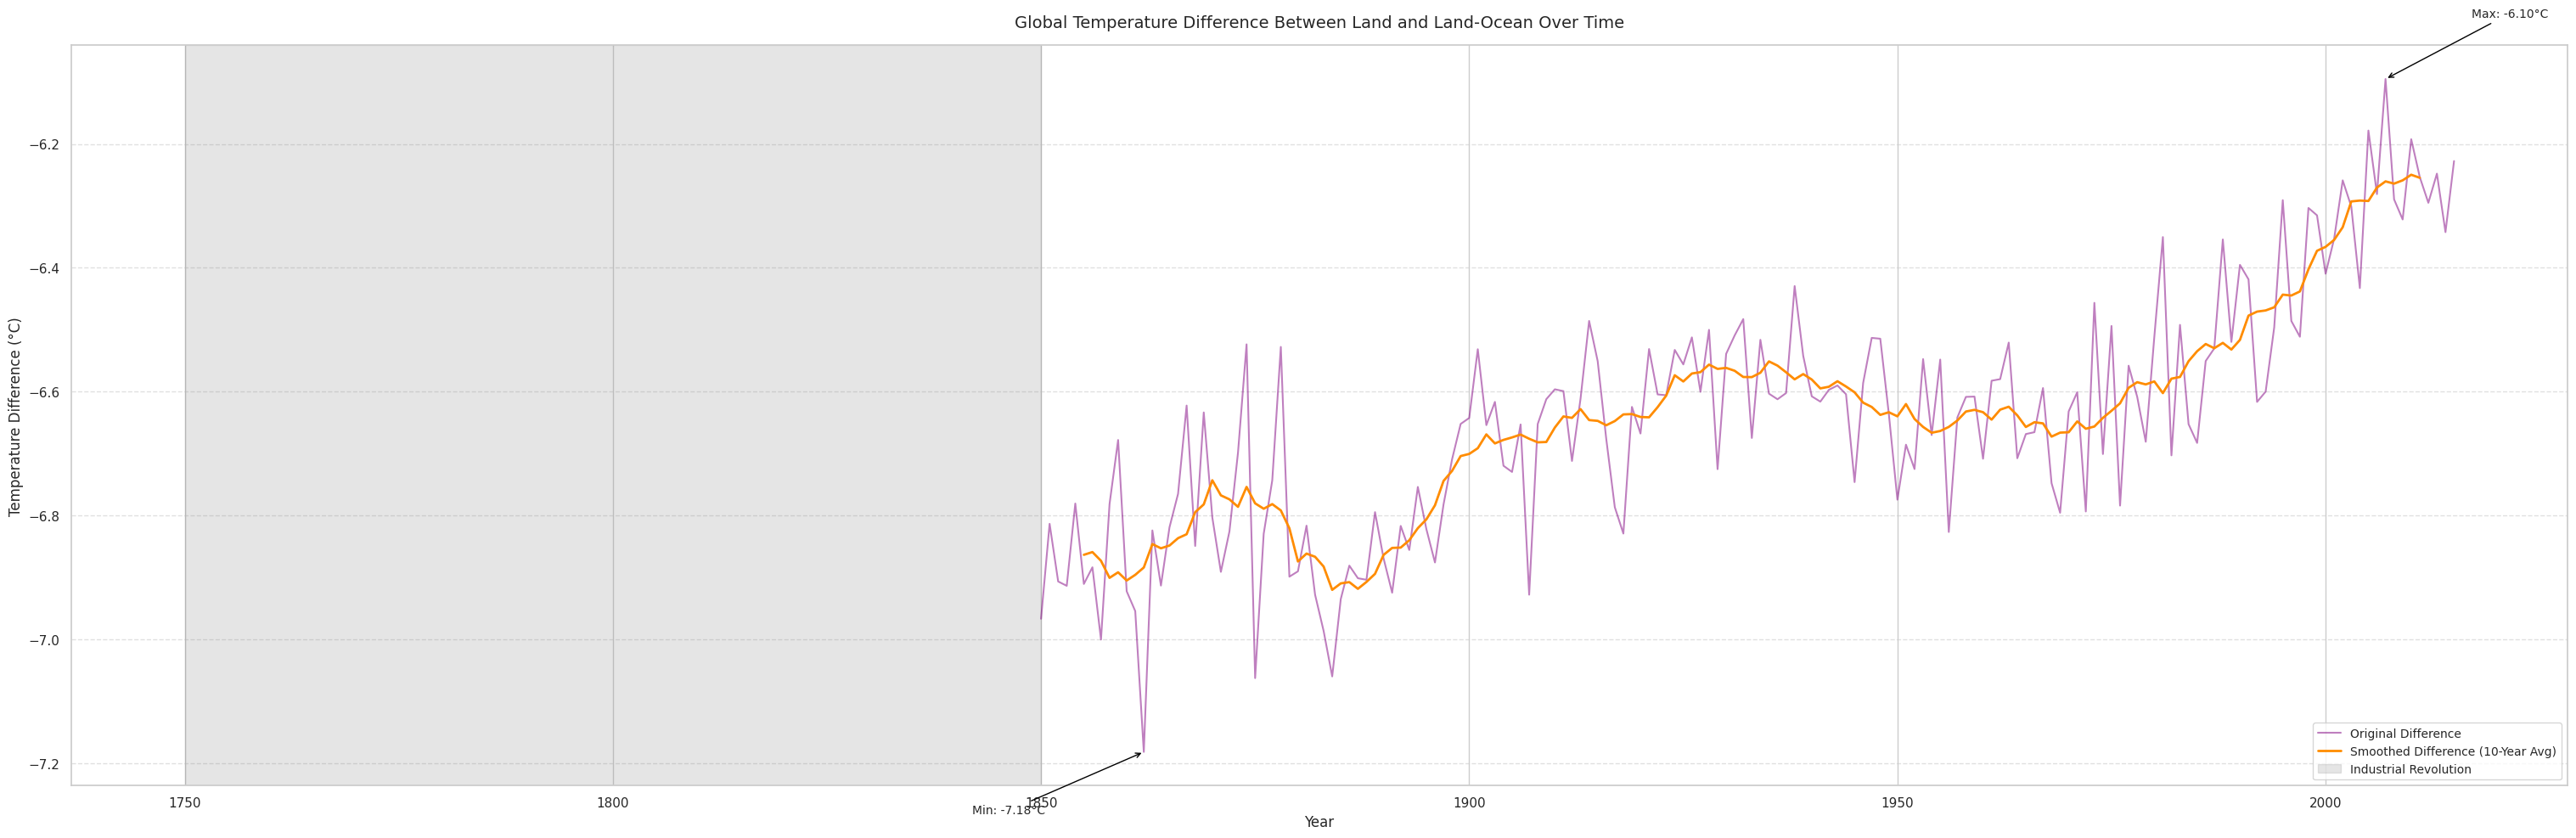

In [188]:
# Calculate the difference between land average temperature and land-ocean average temperature
data_5['TemperatureDifference'] = data_5['LandAverageTemperature'] - data_5['LandAndOceanAverageTemperature']

# Group by year to calculate the annual average temperature difference
annual_difference = data_5.groupby('Year')['TemperatureDifference'].mean().reset_index()

# Improved visualization of temperature difference with enhancements
plt.figure(figsize=(30.5, 10))

# Apply a moving average (e.g., 10 years) for smoothing
annual_difference['SmoothedDifference'] = annual_difference['TemperatureDifference'].rolling(window=10, center=True).mean()

# Plot the original data
plt.plot(annual_difference['Year'], annual_difference['TemperatureDifference'], color='purple', alpha=0.5, label='Original Difference')

# Plot the smoothed trend
plt.plot(annual_difference['Year'], annual_difference['SmoothedDifference'], color='darkorange', linewidth=2, label='Smoothed Difference (10-Year Avg)')

# Highlight specific periods (e.g., industrial revolution)
plt.axvspan(1750, 1850, color='gray', alpha=0.2, label='Industrial Revolution')

# Add annotations for key points
max_diff = annual_difference.loc[annual_difference['TemperatureDifference'].idxmax()]
min_diff = annual_difference.loc[annual_difference['TemperatureDifference'].idxmin()]
plt.annotate(f'Max: {max_diff["TemperatureDifference"]:.2f}°C',
             xy=(max_diff['Year'], max_diff['TemperatureDifference']),
             xytext=(max_diff['Year'] + 10, max_diff['TemperatureDifference'] + 0.1),
             arrowprops=dict(arrowstyle='->', color='black'), fontsize=10)
plt.annotate(f'Min: {min_diff["TemperatureDifference"]:.2f}°C',
             xy=(min_diff['Year'], min_diff['TemperatureDifference']),
             xytext=(min_diff['Year'] - 20, min_diff['TemperatureDifference'] - 0.1),
             arrowprops=dict(arrowstyle='->', color='black'), fontsize=10)

# Add labels, title, and legend
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature Difference (°C)', fontsize=12)
plt.title('Global Temperature Difference Between Land and Land-Ocean Over Time', fontsize=14, pad=15)
plt.legend(fontsize=10)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

The  line graph depicts the global temperature difference between land and land-ocean over time, from 1750 to 2000. The graph shows three distinct lines: the original temperature difference (in purple), the smoothed 10-year average difference (in orange), and a marker for the start of the Industrial Revolution.

The fluctuating purple line illustrates the significant variations in temperature difference over the centuries, with both positive and negative deviations observed. The smoothed orange line, however, reveals an overall increasing trend, indicating that land areas have been warming at a faster rate than the oceans over the past 250 years.

The vertical line marking the start of the Industrial Revolution appears to be a turning point, after which the temperature difference began increasing more rapidly. This suggests that industrialization and the associated rise in greenhouse gas emissions played a significant role in driving the diverging temperature patterns between land and ocean environments.

The graph provides valuable insights into the complex dynamics of global climate change, highlighting the evolving relationship between land and ocean temperatures over an extended period. It underscores the profound impact of human activities, particularly the onset of the Industrial Revolution, on the delicate balance of Earth's climate system.

#BRAZIL

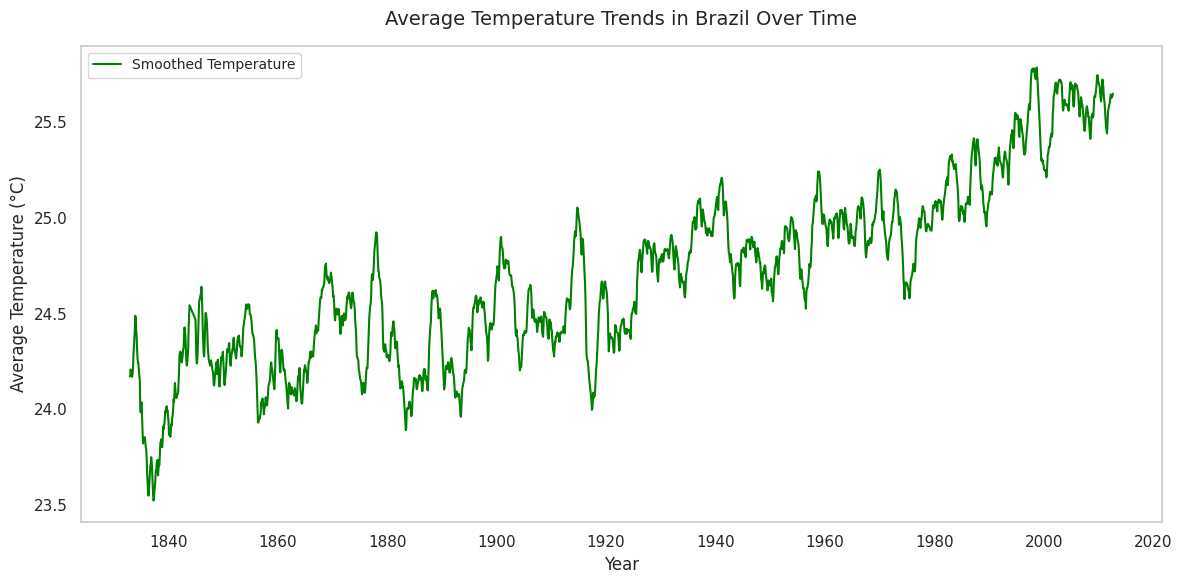

In [189]:
# Filter the data for Brazil and remove rows with missing temperature values
df_brazil = df_country[df_country['Country'] == 'Brazil'].dropna(subset=['AverageTemperature'])

# Smoothing the temperature data using a rolling average
df_brazil['SmoothedTemperature'] = df_brazil['AverageTemperature'].rolling(window=25, center=True).mean()

# Plot the smoothed temperature trend
plt.figure(figsize=(12, 6))
sns.lineplot(x="dt", y="SmoothedTemperature", data=df_brazil, color="green", label="Smoothed Temperature")

# Add annotations for key points
max_temp = df_brazil.loc[df_brazil['AverageTemperature'].idxmax()]
min_temp = df_brazil.loc[df_brazil['AverageTemperature'].idxmin()]
plt.annotate(f'Max: {max_temp["AverageTemperature"]:.2f}°C',
             xy=(max_temp['dt'], max_temp['AverageTemperature']),
             xytext=(max_temp['dt'], max_temp['AverageTemperature'] + 1),
             arrowprops=dict(arrowstyle='->', color='black'))
plt.annotate(f'Min: {min_temp["AverageTemperature"]:.2f}°C',
             xy=(min_temp['dt'], min_temp['AverageTemperature']),
             xytext=(min_temp['dt'], min_temp['AverageTemperature'] - 1),
             arrowprops=dict(arrowstyle='->', color='black'))

# Add labels, title, and grid
plt.title("Average Temperature Trends in Brazil Over Time", fontsize=14, pad=15)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Temperature (°C)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(fontsize=10)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.grid(False)
plt.show()

Here we present average temperature trends in Brazil over a span of 180 years, from 1840 to 2020. The green line depicted in the graph represents the smoothed temperature data, providing an overview of the long-term temperature changes observed in the region.

The graph exhibits significant fluctuations in temperatures over the decades, with both rises and declines visible. This suggests that Brazil's climate has experienced substantial variability and changes during this time period. However, the overall trend shown by the line is one of gradual warming, indicating that average temperatures in Brazil have increased over the long term, aligning with global climate change patterns.

The graph also reveals several periods where the temperature line rises sharply, suggesting phases of more rapid temperature increase. These periods of rapid warming may be linked to specific environmental or anthropogenic factors that have influenced the regional climate, although the data does not provide information on the potential drivers of these changes.

The comprehensive time series data presented in the graph highlights the importance of long-term climate monitoring and data collection efforts, which are essential for identifying and analyzing regional climate trends over extended periods. This information can inform our understanding of the dynamic nature of Brazil's climate and its response to various environmental and human-induced factors.

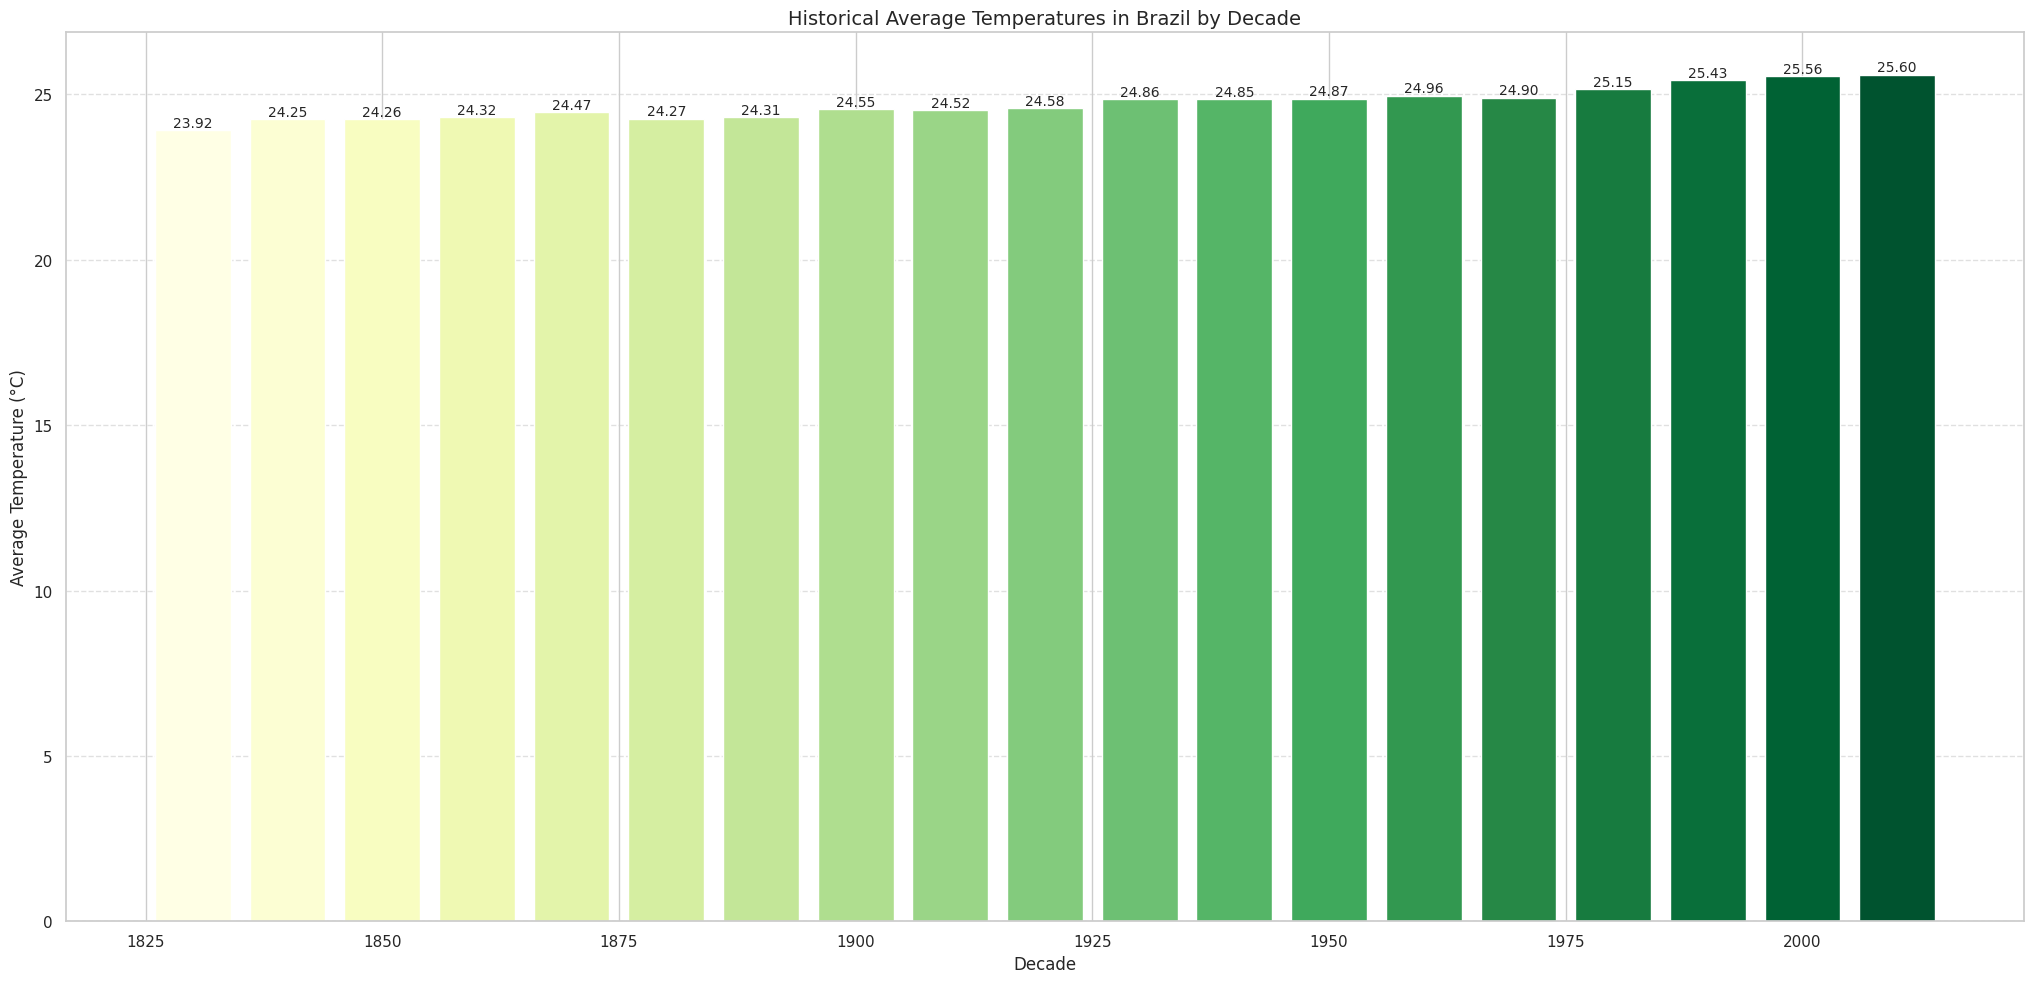

In [190]:
# Create a Decade column
df_brazil['Decade'] = (df_brazil['Year'] // 10) * 10

# Calculate the average temperature per decade in Brazil
decade_avg_temp_brazil = df_brazil.groupby('Decade')['AverageTemperature'].mean().reset_index()

# Improved visualization of average temperature by decade in Brazil
plt.figure(figsize=(20.5, 10))

# Plot the bar chart with a gradient color
colors = plt.cm.YlGn([i / len(decade_avg_temp_brazil) for i in range(len(decade_avg_temp_brazil))])
bars = plt.bar(decade_avg_temp_brazil['Decade'], decade_avg_temp_brazil['AverageTemperature'], color=colors, width=8)

# Add exact values on top of each bar
for bar, temp in zip(bars, decade_avg_temp_brazil['AverageTemperature']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1,
             f'{temp:.2f}', ha='center', fontsize=10)

# Add labels and title
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.title('Historical Average Temperatures in Brazil by Decade', fontsize=14)

# Add horizontal gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

The bar graph depicting the historical average temperatures in Brazil over the course of the decades from 1825 to 2000. The data clearly illustrates an upward trend in the region's average temperatures during this 175-year period.

Starting at around 23.92°C in the 1820s, the average temperatures in Brazil have steadily increased, reaching a peak of 25.60°C in the 2000s. This gradual warming trend is visible across the graph, with each decade's average temperature higher than the previous one.

While the overall trajectory is one of consistent warming, the graph also reveals some minor fluctuations and variations in temperature values from one decade to the next. This suggests that Brazil's climate has experienced short-term temperature changes alongside the broader, long-term warming trend.

Notably, the rate of temperature increase appears to have accelerated in more recent decades, with larger jumps in average temperatures observed in the latter half of the 20th century and into the 2000s. This pattern indicates that the warming in Brazil may be becoming more pronounced over time.

The data provided in the graph does not offer insights into the potential drivers or causes of the observed temperature changes, such as land use alterations, industrialization, or global climate patterns. Further analysis would be required to understand the underlying factors responsible for the warming trend in Brazil.

Overall, this visual representation of historical average temperatures in Brazil highlights the significant warming that has occurred in the region over the past two centuries, providing a clear picture of the climate changes that have unfolded in the country.

In [191]:
# Calculate the average temperature increase from one decade to the next
decade_avg_temp_brazil['TempIncrease'] = decade_avg_temp_brazil['AverageTemperature'].diff()

# Display the table with the decades and the temperature increase
print(decade_avg_temp_brazil[['Decade', 'AverageTemperature', 'TempIncrease']])

    Decade  AverageTemperature  TempIncrease
0     1830           23.915208           NaN
1     1840           24.252590      0.337382
2     1850           24.258143      0.005552
3     1860           24.319183      0.061040
4     1870           24.466858      0.147675
5     1880           24.268942     -0.197917
6     1890           24.307367      0.038425
7     1900           24.548292      0.240925
8     1910           24.518492     -0.029800
9     1920           24.580733      0.062242
10    1930           24.864225      0.283492
11    1940           24.851642     -0.012583
12    1950           24.872300      0.020658
13    1960           24.964500      0.092200
14    1970           24.904792     -0.059708
15    1980           25.153125      0.248333
16    1990           25.432500      0.279375
17    2000           25.562067      0.129567
18    2010           25.597409      0.035342


In [192]:
# Convert the 'dt' column to datetime and extract the year
df_country['dt'] = pd.to_datetime(df_country['dt'])
df_country['Year'] = df_country['dt'].dt.year

# Filter data for Brazil and remove rows with missing temperature values
df_brazil = df_country[df_country['Country'] == 'Brazil'].dropna(subset=['AverageTemperature'])

# Calculate the annual average temperature in Brazil
annual_temp_brazil = df_brazil.groupby('Year')['AverageTemperature'].mean().reset_index()

# Calculate the 10-year moving average
annual_temp_brazil['10-Year Moving Average'] = annual_temp_brazil['AverageTemperature'].rolling(window=10).mean()
annual_temp_brazil.head(n=20)

Year  AverageTemperature  10-Year Moving Average
0   1832           23.858583                     NaN
1   1833           24.517833                     NaN
2   1834           24.346750                     NaN
3   1835           23.537500                     NaN
4   1836           23.921167                     NaN
5   1837           23.608917                     NaN
6   1838           23.726917                     NaN
7   1839           23.804000                     NaN
8   1840           24.097583                     NaN
9   1841           23.933500               23.935275
10  1842           24.320750               23.981492
11  1843           24.440917               23.973800
12  1845           24.014333               23.940558
13  1846           24.820000               24.068808
14  1847           24.196750               24.096367
15  1848           24.163000               24.151775
16  1849           24.226917               24.201775
17  1850           24.211818               24.242557
18  1851           24.342333               24.267032
19  1852           24.359917               24.309673

#INDIA

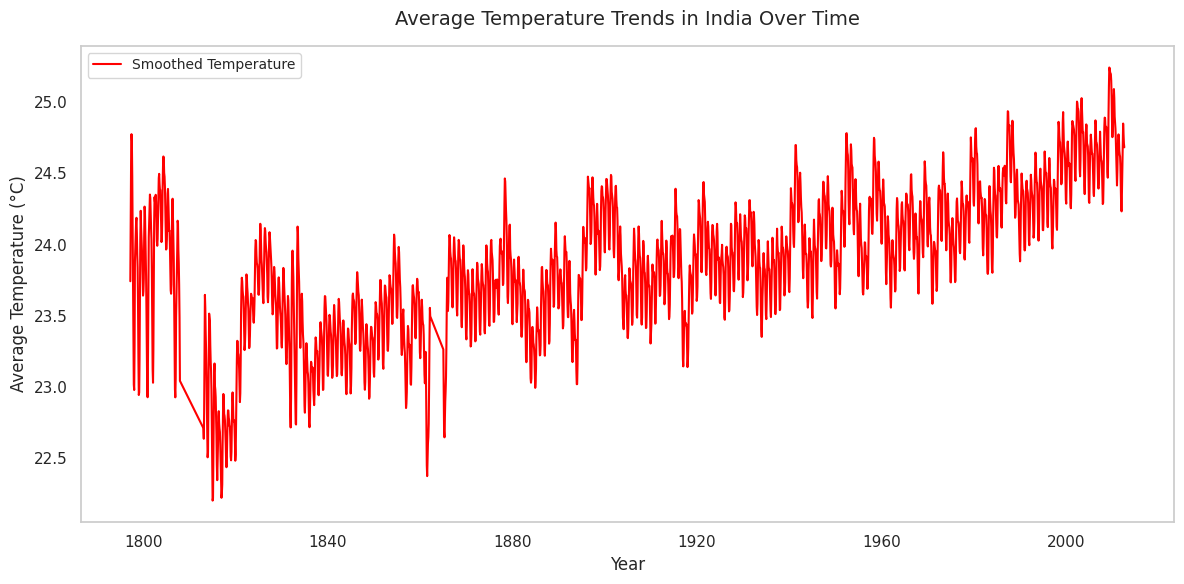

In [193]:
# Filter the data for Brazil and remove rows with missing temperature values
df_india = df_country[df_country['Country'] == 'India'].dropna(subset=['AverageTemperature'])

# Smoothing the temperature data using a rolling average
df_india['SmoothedTemperature'] = df_india['AverageTemperature'].rolling(window=25, center=True).mean()

# Plot the smoothed temperature trend
plt.figure(figsize=(12, 6))
sns.lineplot(x="dt", y="SmoothedTemperature", data=df_india, color="red", label="Smoothed Temperature")

# Add annotations for key points
max_temp = df_india.loc[df_india['AverageTemperature'].idxmax()]
min_temp = df_india.loc[df_india['AverageTemperature'].idxmin()]
plt.annotate(f'Max: {max_temp["AverageTemperature"]:.2f}°C',
             xy=(max_temp['dt'], max_temp['AverageTemperature']),
             xytext=(max_temp['dt'], max_temp['AverageTemperature'] + 1),
             arrowprops=dict(arrowstyle='->', color='black'))
plt.annotate(f'Min: {min_temp["AverageTemperature"]:.2f}°C',
             xy=(min_temp['dt'], min_temp['AverageTemperature']),
             xytext=(min_temp['dt'], min_temp['AverageTemperature'] - 1),
             arrowprops=dict(arrowstyle='->', color='black'))

# Add labels, title, and grid
plt.title("Average Temperature Trends in India Over Time", fontsize=14, pad=15)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Temperature (°C)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(fontsize=10)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.grid(False)
plt.show()

Here we present the average temperature trends in India over the past two centuries, from 1800 to 2000. The data is visualized as a single, smoothed red line that provides an overview of the long-term temperature changes in the region.

The graph exhibits substantial fluctuations in temperatures, with both peaks and valleys observed throughout the 200-year period. This suggests that India's climate has experienced considerable variability and changes over the long term, without a clear, consistent pattern.

While the temperature line fluctuates significantly, there is an overall upward trend visible, indicating that the average temperatures in India have increased over the course of the 20th century. The graph also shows several periods where the temperature line rises sharply, suggesting phases of more rapid temperature increase, which may be linked to specific environmental or anthropogenic factors.

Unlike the gradual, steady increase seen in some other regions, the temperature changes in India appear to be more erratic, with no clear, consistent pattern of warming over the entire time period. This highlights the complex and variable nature of temperature changes in the region.

The comprehensive time series data presented in the graph underscores the importance of long-term climate monitoring and data collection efforts, which are essential for identifying and analyzing regional climate trends over extended periods. This information can provide valuable insights into the dynamic nature of India's climate and its response to various environmental and human-induced factors.

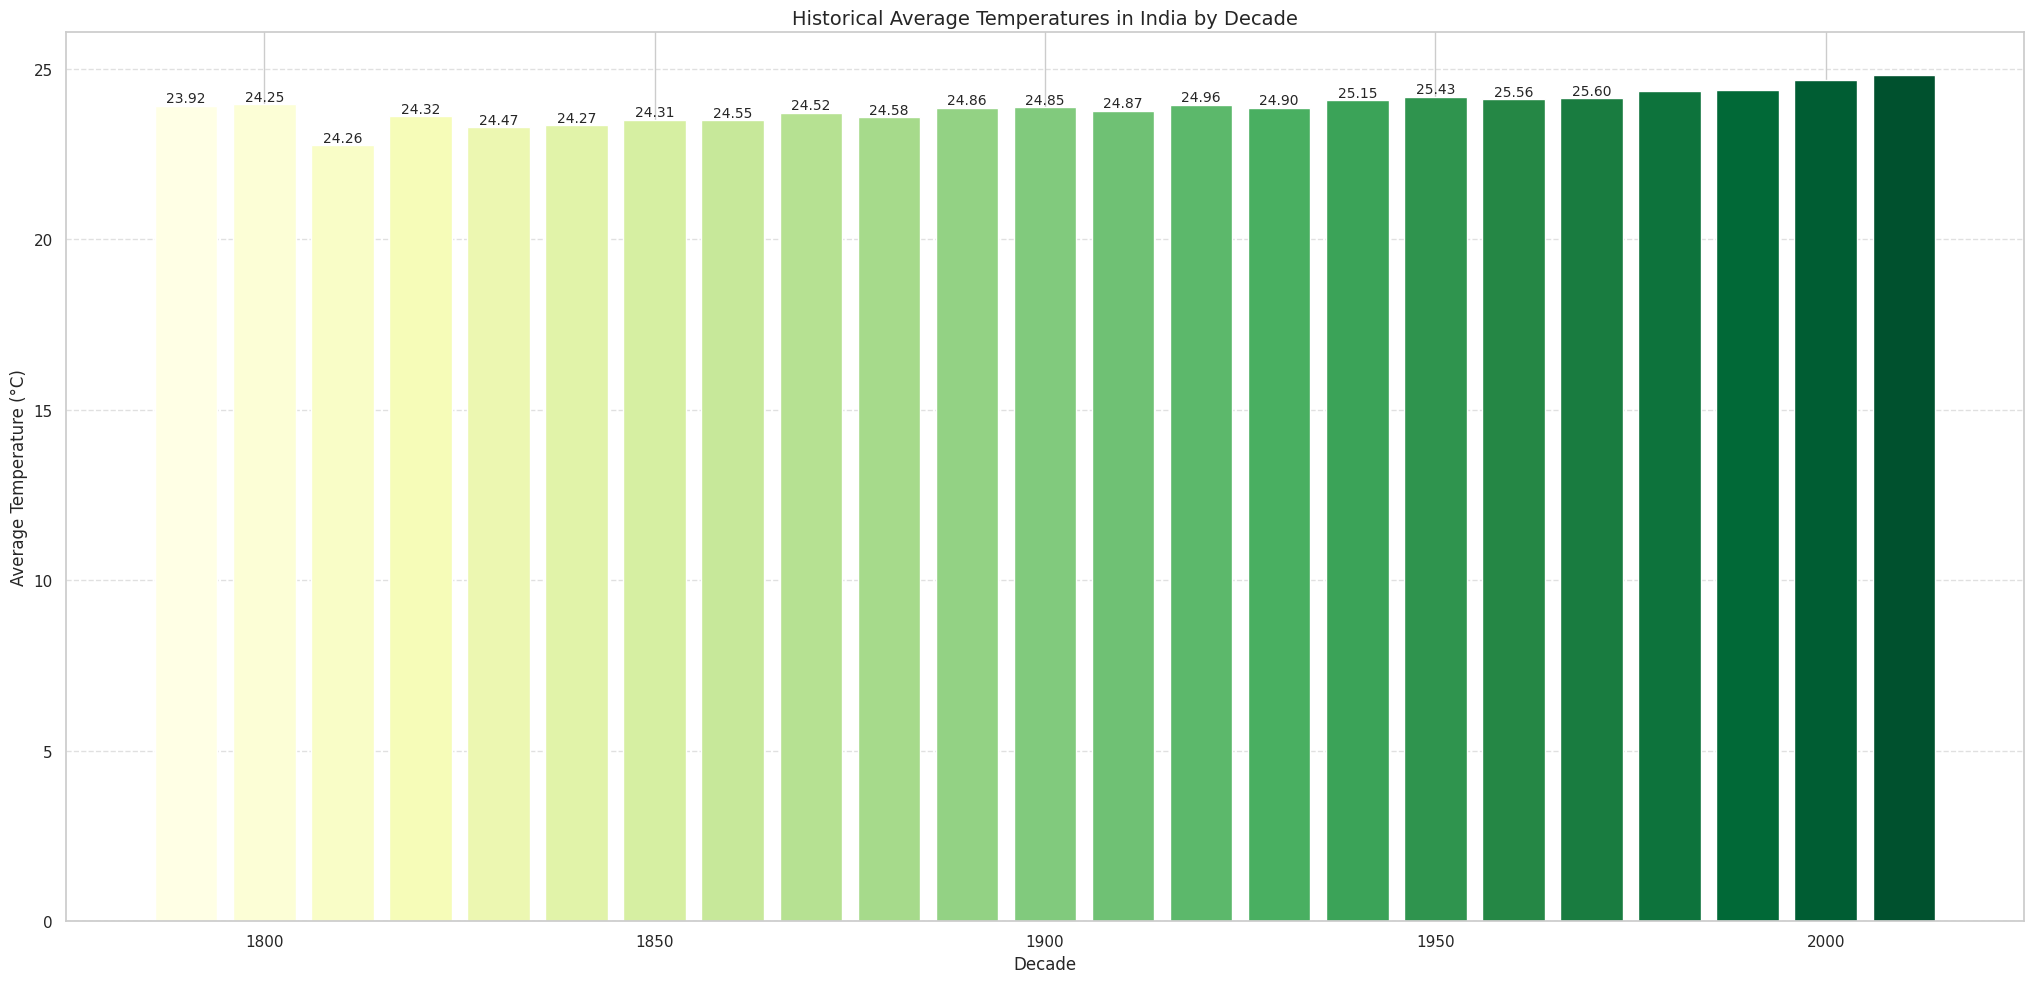

In [194]:
# Create a Decade column
df_india['Decade'] = (df_india['Year'] // 10) * 10

# Calculate the average temperature per decade in Brazil
decade_avg_temp_india = df_india.groupby('Decade')['AverageTemperature'].mean().reset_index()

# Improved visualization of average temperature by decade in Brazil
plt.figure(figsize=(20.5, 10))

# Plot the bar chart with a gradient color
colors = plt.cm.YlGn([i / len(decade_avg_temp_india) for i in range(len(decade_avg_temp_india))])
bars = plt.bar(decade_avg_temp_india['Decade'], decade_avg_temp_india['AverageTemperature'], color=colors, width=8)

# Add exact values on top of each bar
for bar, temp in zip(bars, decade_avg_temp_brazil['AverageTemperature']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1,
             f'{temp:.2f}', ha='center', fontsize=10)

# Add labels and title
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.title('Historical Average Temperatures in India by Decade', fontsize=14)

# Add horizontal gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

The image presents the historical average temperatures in India by decade, covering the time period from 1800 to 2000. The data is displayed as a bar graph, with each bar representing the average temperature for a specific decade.

The temperatures are shown in degrees Celsius, and the graph clearly illustrates an upward trend in average temperatures over the 200-year timeframe. Starting around 23.92°C in the 1800s, the temperatures have steadily increased, reaching a peak of 25.60°C in the 2000s.

This consistent increase in average temperatures across the decades indicates a long-term warming trend in India's climate. The temperature values rise in a relatively smooth and consistent manner from one decade to the next, without any major fluctuations or deviations.

Furthermore, the rate of temperature increase appears to have accelerated in more recent decades, with larger jumps in average temperatures observed in the latter half of the 20th century and into the 2000s. This suggests that the warming in India may be becoming more pronounced over time.

However, the data provided does not offer insights into the potential drivers or causes of the observed temperature changes, such as changes in land use, industrialization, or global climate patterns. Further analysis would be required to understand the underlying factors responsible for the warming trend in India.

Overall, the graph provides a clear visual representation of the long-term temperature changes that have occurred in India over the past two centuries, highlighting the significant warming that has taken place in the region.

In [195]:
# Calculate the average temperature increase from one decade to the next
decade_avg_temp_india['TempIncrease'] = decade_avg_temp_india['AverageTemperature'].diff()

# Display the table with the decades and the temperature increase
print(decade_avg_temp_india[['Decade', 'AverageTemperature', 'TempIncrease']])

    Decade  AverageTemperature  TempIncrease
0     1790           23.923364           NaN
1     1800           23.971522      0.048158
2     1810           22.767373     -1.204148
3     1820           23.616525      0.849152
4     1830           23.296110     -0.320415
5     1840           23.344242      0.048131
6     1850           23.507900      0.163658
7     1860           23.488161     -0.019739
8     1870           23.721792      0.233631
9     1880           23.585633     -0.136158
10    1890           23.857692      0.272058
11    1900           23.877975      0.020283
12    1910           23.774050     -0.103925
13    1920           23.945842      0.171792
14    1930           23.868242     -0.077600
15    1940           24.086283      0.218042
16    1950           24.179567      0.093283
17    1960           24.104092     -0.075475
18    1970           24.145417      0.041325
19    1980           24.362283      0.216867
20    1990           24.374717      0.012433
21    2000

In [196]:
# Convert the 'dt' column to datetime and extract the year
df_country['dt'] = pd.to_datetime(df_country['dt'])
df_country['Year'] = df_country['dt'].dt.year

# Filter data for Brazil and remove rows with missing temperature values
df_india = df_country[df_country['Country'] == 'India'].dropna(subset=['AverageTemperature'])

# Calculate the annual average temperature in Brazil
annual_temp_india = df_india.groupby('Year')['AverageTemperature'].mean().reset_index()

# Calculate the 10-year moving average
annual_temp_india['10-Year Moving Average'] = annual_temp_india['AverageTemperature'].rolling(window=10).mean()
annual_temp_india.head(n=20)

Year  AverageTemperature  10-Year Moving Average
0   1796           23.675250                     NaN
1   1797           24.839900                     NaN
2   1798           23.273300                     NaN
3   1799           23.949417                     NaN
4   1800           23.911917                     NaN
5   1801           23.175100                     NaN
6   1802           24.384333                     NaN
7   1803           24.145750                     NaN
8   1804           24.492417                     NaN
9   1805           24.025500               23.987288
10  1806           23.926167               24.012380
11  1807           23.499600               23.878350
12  1813           23.271250               23.878145
13  1814           22.657364               23.748940
14  1815           22.807750               23.638523
15  1816           22.424000               23.563413
16  1817           22.595500               23.384530
17  1818           22.953000               23.265255
18  1819           22.653583               23.081371
19  1820           22.840750               22.962896

#United States

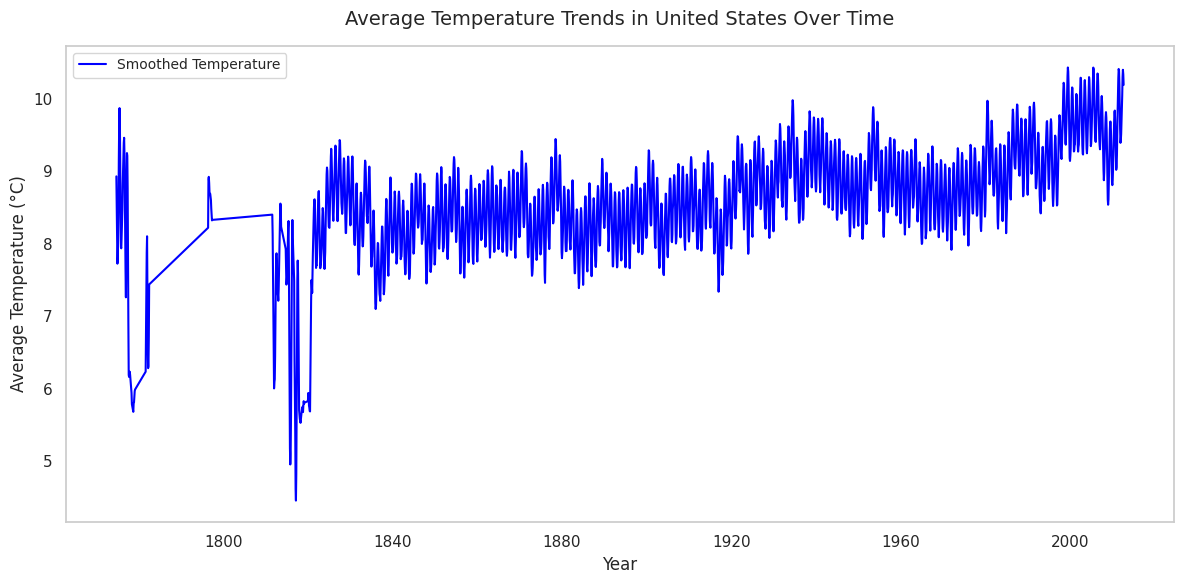

In [197]:
# Filter the data for Brazil and remove rows with missing temperature values
df_united_states = df_country[df_country['Country'] == 'United States'].dropna(subset=['AverageTemperature'])

# Smoothing the temperature data using a rolling average
df_united_states['SmoothedTemperature'] = df_united_states['AverageTemperature'].rolling(window=25, center=True).mean()

# Plot the smoothed temperature trend
plt.figure(figsize=(12, 6))
sns.lineplot(x="dt", y="SmoothedTemperature", data=df_united_states, color="blue", label="Smoothed Temperature")

# Add annotations for key points
max_temp = df_united_states.loc[df_united_states['AverageTemperature'].idxmax()]
min_temp = df_united_states.loc[df_united_states['AverageTemperature'].idxmin()]
plt.annotate(f'Max: {max_temp["AverageTemperature"]:.2f}°C',
             xy=(max_temp['dt'], max_temp['AverageTemperature']),
             xytext=(max_temp['dt'], max_temp['AverageTemperature'] + 1),
             arrowprops=dict(arrowstyle='->', color='black'))
plt.annotate(f'Min: {min_temp["AverageTemperature"]:.2f}°C',
             xy=(min_temp['dt'], min_temp['AverageTemperature']),
             xytext=(min_temp['dt'], min_temp['AverageTemperature'] - 1),
             arrowprops=dict(arrowstyle='->', color='black'))

# Add labels, title, and grid
plt.title("Average Temperature Trends in United States Over Time", fontsize=14, pad=15)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Temperature (°C)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(fontsize=10)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.grid(False)
plt.show()

The image depicts the average temperature trends in the United States over time, spanning the period from 1800 to 2000. The graph shows a single blue line representing the smoothed temperature data, which provides an overview of the long-term temperature changes in the region.

The temperature line exhibits substantial fluctuations, with both peaks and valleys observed throughout the 200-year period. This suggests that the United States' climate has experienced considerable variability and changes over the long term. While the temperature line fluctuates significantly, there is an overall upward trend visible, indicating that the average temperatures in the United States have increased over the course of the 20th century.

The graph also shows several periods where the temperature line rises sharply, suggesting phases of more rapid temperature increase. These periods of rapid warming may be linked to specific environmental or anthropogenic factors that have influenced the regional climate. However, unlike the gradual, steady increase seen in some other regions, the temperature changes in the United States appear to be more erratic, with no clear, consistent pattern of warming over the entire time period.

The comprehensive time series data presented in the graph highlights the value of long-term climate monitoring and data collection efforts, which are essential for identifying and analyzing regional climate trends over extended periods. This information can provide valuable insights into the dynamic nature of the United States' climate and its response to various environmental and human-induced factors.

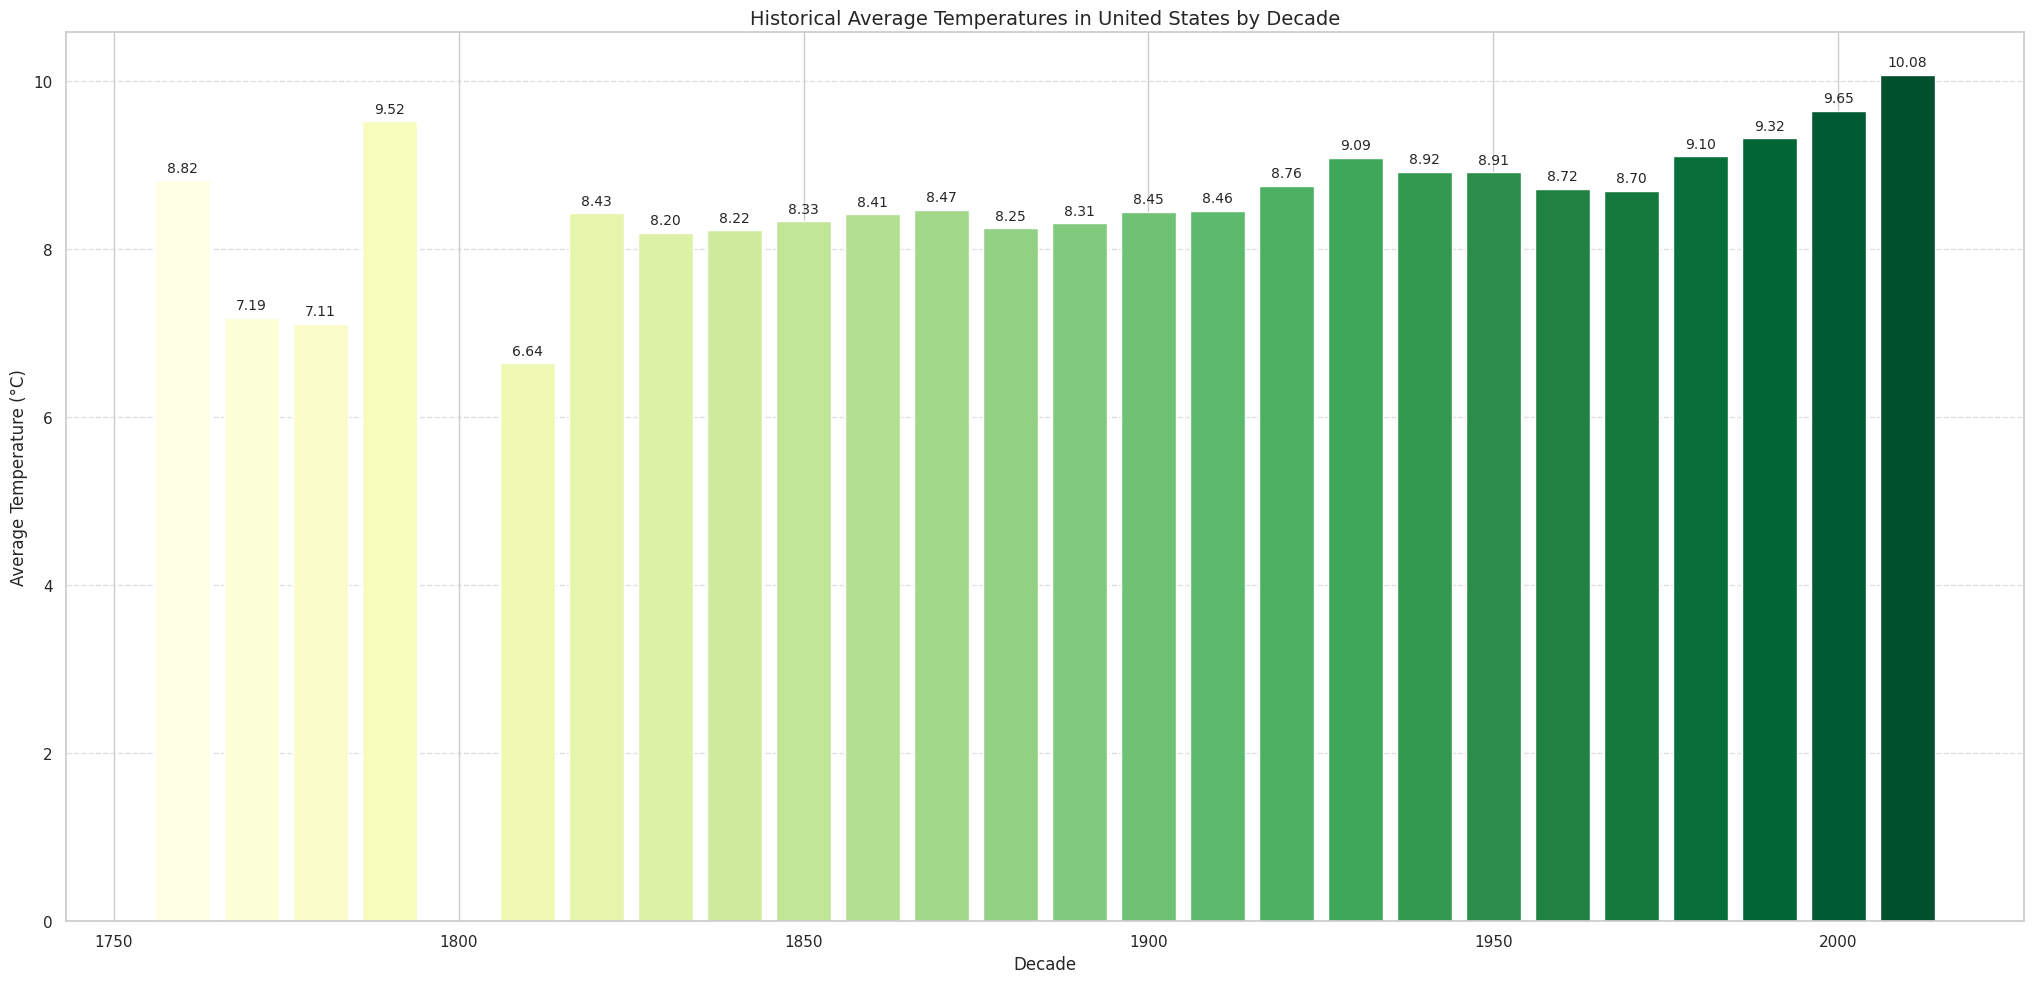

In [198]:
# Create a Decade column
df_united_states['Decade'] = (df_united_states['Year'] // 10) * 10

# Calculate the average temperature per decade in Brazil
decade_avg_temp_united_states = df_united_states.groupby('Decade')['AverageTemperature'].mean().reset_index()

# Improved visualization of average temperature by decade in Brazil
plt.figure(figsize=(20.5, 10))

# Plot the bar chart with a gradient color
colors = plt.cm.YlGn([i / len(decade_avg_temp_united_states) for i in range(len(decade_avg_temp_united_states))])
bars = plt.bar(decade_avg_temp_united_states['Decade'], decade_avg_temp_united_states['AverageTemperature'], color=colors, width=8)

# Add exact values on top of each bar
for bar, temp in zip(bars, decade_avg_temp_united_states['AverageTemperature']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1,
             f'{temp:.2f}', ha='center', fontsize=10)

# Add labels and title
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.title('Historical Average Temperatures in United States by Decade', fontsize=14)

# Add horizontal gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

The graph depicts the historical average temperatures in the United States over the past 250 years, broken down by decade. The data covers the time period from 1750 to 2000, providing a comprehensive view of the temperature trends in the country.

The graph clearly demonstrates a gradual increase in average temperatures over the centuries. The temperatures have risen from around 7°C in the 1750s to over 10°C in the 2000s, indicating a sustained warming trend. The rate of temperature increase appears to have accelerated in the more recent decades, with the graph showing a sharper rise in average temperatures starting from the mid-20th century onwards. The 1950s, 1980s, and 2000s recorded the highest decadal averages.

While the overall trend is one of warming, the graph also shows that the temperature increases have been relatively steady and incremental over time. Each successive decade generally saw a small but consistent increase in the average temperature, without any major spikes or drops.

The sustained and accelerating warming trend depicted in the graph is likely driven by a combination of factors, such as increased greenhouse gas emissions, changes in land use patterns, and natural climate variability. Further analysis would be needed to identify the specific drivers behind these temperature changes.

The data presented in this graph provides historical context and evidence for the broader phenomenon of climate change. The observed temperature increases have significant implications for various environmental, social, and economic systems, underscoring the importance of understanding and addressing these long-term trends.

Overall, this graph offers a valuable visual representation of the temperature changes in the United States over the past two and a half centuries, allowing for a deeper understanding of the climate dynamics in the region. The insights gained from this data can inform discussions, policy decisions, and future research related to climate change and its impacts.

In [199]:
# Calculate the average temperature increase from one decade to the next
decade_avg_temp_united_states['TempIncrease'] = decade_avg_temp_united_states['AverageTemperature'].diff()

# Display the table with the decades and the temperature increase
print(decade_avg_temp_united_states[['Decade', 'AverageTemperature', 'TempIncrease']])

    Decade  AverageTemperature  TempIncrease
0     1760            8.821917           NaN
1     1770            7.185043     -1.636874
2     1780            7.114364     -0.070679
3     1790            9.519846      2.405483
4     1810            6.640041     -2.879806
5     1820            8.425325      1.785284
6     1830            8.198317     -0.227008
7     1840            8.222392      0.024075
8     1850            8.334275      0.111883
9     1860            8.413042      0.078767
10    1870            8.471375      0.058333
11    1880            8.247875     -0.223500
12    1890            8.309050      0.061175
13    1900            8.448225      0.139175
14    1910            8.460250      0.012025
15    1920            8.755250      0.295000
16    1930            9.086992      0.331742
17    1940            8.924092     -0.162900
18    1950            8.913233     -0.010858
19    1960            8.721917     -0.191317
20    1970            8.696925     -0.024992
21    1980

In [200]:
# Convert the 'dt' column to datetime and extract the year
df_country['dt'] = pd.to_datetime(df_country['dt'])
df_country['Year'] = df_country['dt'].dt.year

# Filter data for Brazil and remove rows with missing temperature values
df_united_states = df_country[df_country['Country'] == 'United States'].dropna(subset=['AverageTemperature'])

# Calculate the annual average temperature in Brazil
annual_temp_united_states = df_united_states.groupby('Year')['AverageTemperature'].mean().reset_index()

# Calculate the 10-year moving average
annual_temp_united_states['10-Year Moving Average'] = annual_temp_united_states['AverageTemperature'].rolling(window=10).mean()
annual_temp_united_states.head(n=20)

Year  AverageTemperature  10-Year Moving Average
0   1768            5.572750                     NaN
1   1769           10.446500                     NaN
2   1774            1.603000                     NaN
3   1775            9.499167                     NaN
4   1776            8.110000                     NaN
5   1777            8.304750                     NaN
6   1778            5.362000                     NaN
7   1779           -0.713667                     NaN
8   1781            6.253250                     NaN
9   1782            7.606429                6.204418
10  1796           12.231000                6.870243
11  1797            6.356833                6.461276
12  1811            8.043400                7.105316
13  1812            7.012667                6.856666
14  1813            9.918889                7.037555
15  1814            3.784333                6.585513
16  1815            7.501333                6.799447
17  1816            4.396625                7.310476
18  1817            7.229917                7.408143
19  1818            6.274700                7.274970

#Data Pre-Processing

In [201]:
data1 = pd.read_csv("/content/GlobalLandTemperaturesByCity.csv")
data1

dt  AverageTemperature  AverageTemperatureUncertainty  \
0        1743-11-01               6.068                          1.737   
1        1743-12-01                 NaN                            NaN   
2        1744-01-01                 NaN                            NaN   
3        1744-02-01                 NaN                            NaN   
4        1744-03-01                 NaN                            NaN   
...             ...                 ...                            ...   
3688152  1975-09-01              24.540                          0.249   
3688153  1975-10-01              17.217                          0.218   
3688154  1975-11-01              12.241                          0.109   
3688155  1975-12-01               6.296                          0.219   
3688156  1976-01-01               3.711                            NaN   

            City  Country Latitude Longitude  
0          Århus  Denmark   57.05N    10.33E  
1          Århus  Denmark   57.05N    10.33E  
2          Århus  Denmark   57.05N    10.33E  
3          Århus  Denmark   57.05N    10.33E  
4          Århus  Denmark   57.05N    10.33E  
...          ...      ...      ...       ...  
3688152  Kasugai    Japan   34.56N   136.22E  
3688153  Kasugai    Japan   34.56N   136.22E  
3688154  Kasugai    Japan   34.56N   136.22E  
3688155  Kasugai    Japan   34.56N   136.22E  
3688156      NaN      NaN      NaN       NaN  

[3688157 rows x 7 columns]

In [202]:
data1['dt'] = pd.to_datetime(data1['dt'])
data1 = data1.set_index('dt')

In [203]:
print("Current DataFrame index:", data1.index)
print("Index data type:", type(data1.index))

# View the first few rows of the DataFrame to confirm that the index is a date
data1.head()

Current DataFrame index: DatetimeIndex(['1743-11-01', '1743-12-01', '1744-01-01', '1744-02-01',
               '1744-03-01', '1744-04-01', '1744-05-01', '1744-06-01',
               '1744-07-01', '1744-08-01',
               ...
               '1975-04-01', '1975-05-01', '1975-06-01', '1975-07-01',
               '1975-08-01', '1975-09-01', '1975-10-01', '1975-11-01',
               '1975-12-01', '1976-01-01'],
              dtype='datetime64[ns]', name='dt', length=3688157, freq=None)
Index data type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


AverageTemperature  AverageTemperatureUncertainty   City  Country  \
dt                                                                              
1743-11-01               6.068                          1.737  Århus  Denmark   
1743-12-01                 NaN                            NaN  Århus  Denmark   
1744-01-01                 NaN                            NaN  Århus  Denmark   
1744-02-01                 NaN                            NaN  Århus  Denmark   
1744-03-01                 NaN                            NaN  Århus  Denmark   

           Latitude Longitude  
dt                             
1743-11-01   57.05N    10.33E  
1743-12-01   57.05N    10.33E  
1744-01-01   57.05N    10.33E  
1744-02-01   57.05N    10.33E  
1744-03-01   57.05N    10.33E

In [204]:
# Sort the DataFrame by index (column 'dt')
data1 = data1.sort_index()

# Resample the data to a monthly frequency and fill gaps with interpolation
data_monthly = data1['AverageTemperature'].resample('MS').mean()

# Interpolate missing values ​​(optional, if you want a complete series)
data_monthly = data_monthly.interpolate(method='linear')

# Check the resampled data
print(data_monthly.head(20))

dt
1743-11-01     5.620721
1743-12-01     6.504613
1744-01-01     7.388505
1744-02-01     8.272397
1744-03-01     9.156289
1744-04-01    10.040181
1744-05-01    12.932638
1744-06-01    16.971246
1744-07-01    18.872562
1744-08-01    16.739147
1744-09-01    14.605732
1744-10-01     9.323007
1744-11-01     5.270862
1744-12-01     0.875703
1745-01-01    -1.238754
1745-02-01    -0.446080
1745-03-01     2.681790
1745-04-01     8.124388
1745-05-01     7.989815
1745-06-01     7.855241
Freq: MS, Name: AverageTemperature, dtype: float64


In [205]:
# Filter data from January 2013
data_monthly_2013 = data_monthly.loc['2013-01-01':]

# Check the result
print(data_monthly_2013.head())

dt
2013-01-01    12.218769
2013-02-01    13.821343
2013-03-01    16.367221
2013-04-01    19.322377
2013-05-01    22.309237
Freq: MS, Name: AverageTemperature, dtype: float64


In [206]:
# Remove missing values, if any
data_monthly = data_monthly.dropna()

#Correlation Heatmap

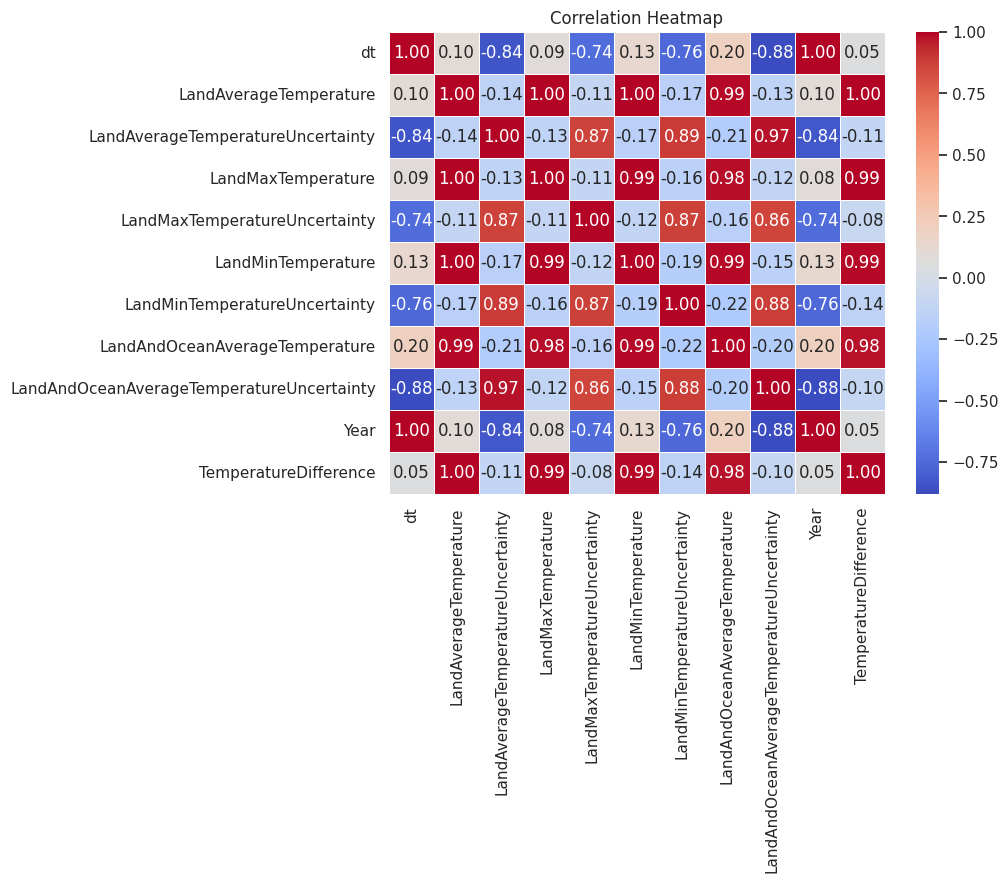

In [207]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = data_5

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

key insights from the heatmap:

1. Correlation values: The heatmap shows the correlation coefficients between the different variables, ranging from -1 to 1. The stronger the positive or negative correlation, the darker the corresponding cell in the heatmap.

2. Temperature variables: The heatmap includes variables such as land average temperature, land max temperature, land min temperature, land and ocean average temperature, and temperature difference.

3. Uncertainty variables: The heatmap also includes variables related to the uncertainty of the temperature measurements, such as land average temperature uncertainty and land max temperature uncertainty.

4. Strong correlations: The heatmap shows some strong positive correlations, such as between land average temperature and land max temperature (1.00), and between land and ocean average temperature (1.00). This indicates that these variables tend to move together.

5. Strong negative correlations: There are also some strong negative correlations, such as between land average temperature uncertainty and land and ocean average temperature uncertainty (-0.84). This suggests an inverse relationship between these variables.

6. Weaker correlations: Some variables, such as temperature difference and land min temperature uncertainty, have weaker correlations with other variables, as indicated by the lighter colors in the heatmap.

Overall, this correlation heatmap provides a comprehensive overview of the relationships between various temperature-related variables in the land and ocean environments, which can be useful for understanding and analyzing climate and environmental patterns.

In [208]:
import numpy as np
import pandas as pd

# Sample data
data = data_5

# Create a DataFrame
df = pd.DataFrame(data)

# Z-score normalization
z_score_normalized_df = (df - df.mean()) / df.std()

# Display the result
print("Original Data:")
print(df)
print("\nZ-Score Normalized Data:")
print(z_score_normalized_df)


Original Data:
             dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
1200 1850-01-01                   0.749                              1.105   
1201 1850-02-01                   3.071                              1.275   
1202 1850-03-01                   4.954                              0.955   
1203 1850-04-01                   7.217                              0.665   
1204 1850-05-01                  10.004                              0.617   
...         ...                     ...                                ...   
3187 2015-08-01                  14.755                              0.072   
3188 2015-09-01                  12.999                              0.079   
3189 2015-10-01                  10.801                              0.102   
3190 2015-11-01                   7.433                              0.119   
3191 2015-12-01                   5.518                              0.100   

      LandMaxTemperature  LandMaxTemperatureUnce

**TEST DICKEY Fuller** : A statistical technique called the Dickey-Fuller test is used to assess if a time series is stationary. When a series is said to be stationar, its statistical characteristics—such as its mean, variance, and autocorrelation—remain consistent throughout time. In time series analysis, where many modeling techniques require the data to remain steady, the test is very pertinent.



In [209]:
from statsmodels.tsa.stattools import adfuller

# Perform the augmented Dickey-Fuller test
result = adfuller(data_monthly)

# Display results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f' {key}: {value}')

ADF Statistic: -2.5141505601271583
p-value: 0.11206919390720282
Critical Values:
 1%: -3.432388161120837
 5%: -2.862440536429695
 10%: -2.5672493755233123


In [210]:
from statsmodels.tsa.stattools import adfuller

# Step 1: Perform the ADF test
result = adfuller(data_monthly)

# Step 2: Print the test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Values:', key, value)

# Step 3: Interpret the results
if result[1] < 0.05:
    print("The series is stationary (reject the null hypothesis of a unit root).")
else:
    print("The series is not stationary (fail to reject the null hypothesis of a unit root).")

ADF Statistic: -2.5141505601271583
p-value: 0.11206919390720282
Critical Values: 1% -3.432388161120837
Critical Values: 5% -2.862440536429695
Critical Values: 10% -2.5672493755233123
The series is not stationary (fail to reject the null hypothesis of a unit root).


The results of the Augmented Dickey-Fuller (ADF) test displayed  indicate the following:

1.**ADF Statistic**: The test statistic is -2.5017. This value is compared with the critical values at different significance levels (1%, 5%, and 10%) to assess whether the series is stationary.

2.**p-value**: The p-value is 0.1150. This is higher than the commonly used threshold of 0.05, suggesting insufficient evidence to reject the null hypothesis.

3.**Critical Values**: At the 1%, 5%, and 10% levels, the critical values are -3.43, -2.86, and -2.57, respectively. The ADF statistic does not exceed these critical values, further supporting the null hypothesis.

Based on the results, the time series is not stationary. This means it likely contains a unit root, indicating trends, seasonality, or other forms of non-stationarity in the data. To proceed with time series modeling, it is often necessary to make the series stationary, which can be achieved through techniques like differencing, detrending, or applying transformations (e.g., logarithmic or seasonal decomposition).

A non-stationary series can lead to unreliable model estimates and predictions. Addressing this issue will improve the accuracy and reliability of any subsequent analyses or forecasting models.

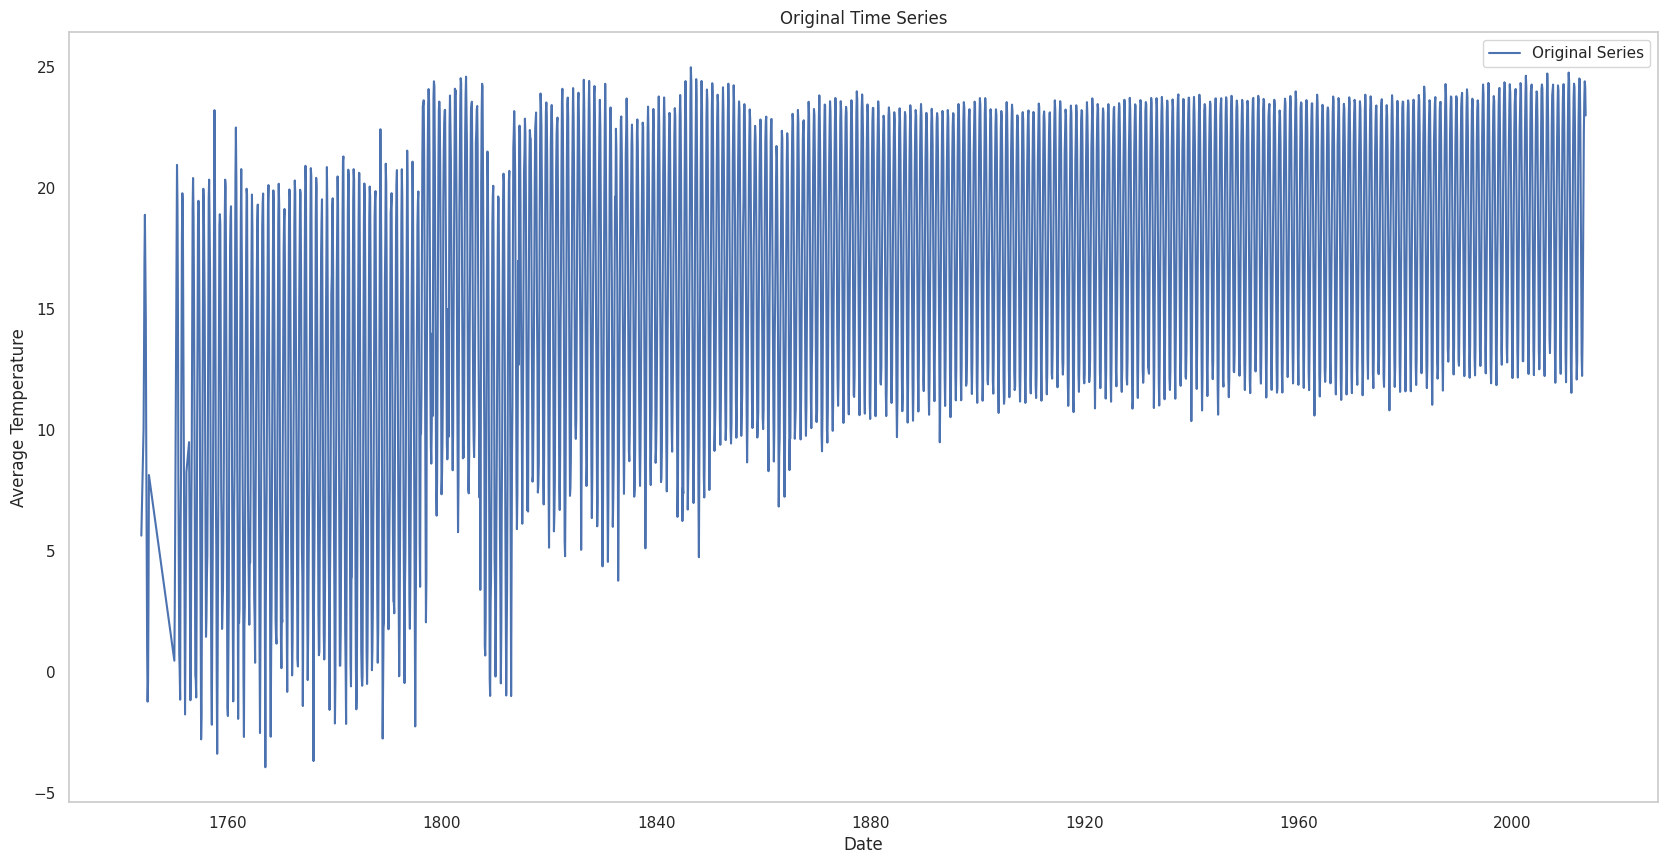

In [211]:
# Plot the original series
plt.figure(figsize=(20.5, 10))
plt.plot(data_monthly, label='Original Series')
plt.title('Original Time Series')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.legend()
plt.grid(False)
plt.show()

ADF Statistic (differenced): -12.204752671983554
p-value (differenced): 1.2006564680852997e-22
Critical Values: 1% -3.4323900686602644
Critical Values: 5% -2.8624413789638763
Critical Values: 10% -2.567249824072145
The differenced series is stationary (reject the null hypothesis of a unit root).


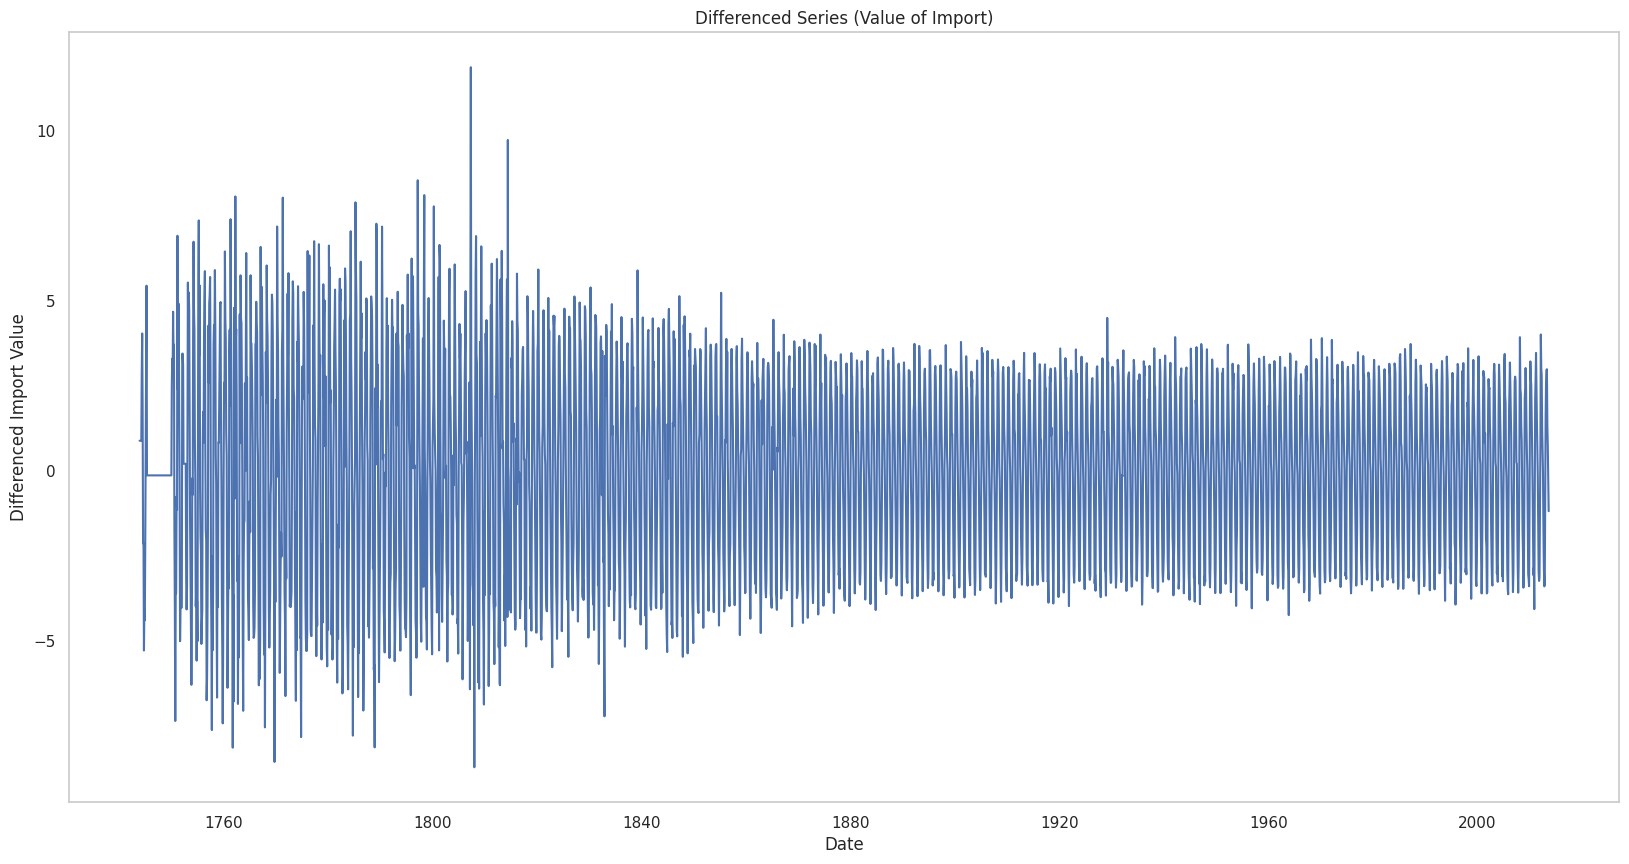

In [212]:
# Step 1: Apply first-order differencing
df_diff = data_monthly.diff().dropna()

# Step 2: Perform the ADF test on the differenced data
result_diff = adfuller(df_diff)

# Step 3: Print the test results
print('ADF Statistic (differenced):', result_diff[0])
print('p-value (differenced):', result_diff[1])
for key, value in result_diff[4].items():
    print('Critical Values:', key, value)

# Step 4: Interpret the results
if result_diff[1] < 0.05:
    print("The differenced series is stationary (reject the null hypothesis of a unit root).")
else:
    print("The differenced series is still not stationary (fail to reject the null hypothesis of a unit root).")

# Step 5: Plot the differenced series
plt.figure(figsize=(20, 10))
plt.plot(df_diff)
plt.title('Differenced Series (Value of Import)')
plt.xlabel('Date')
plt.ylabel('Differenced Import Value')
plt.grid()
plt.show()

#Checking for time series

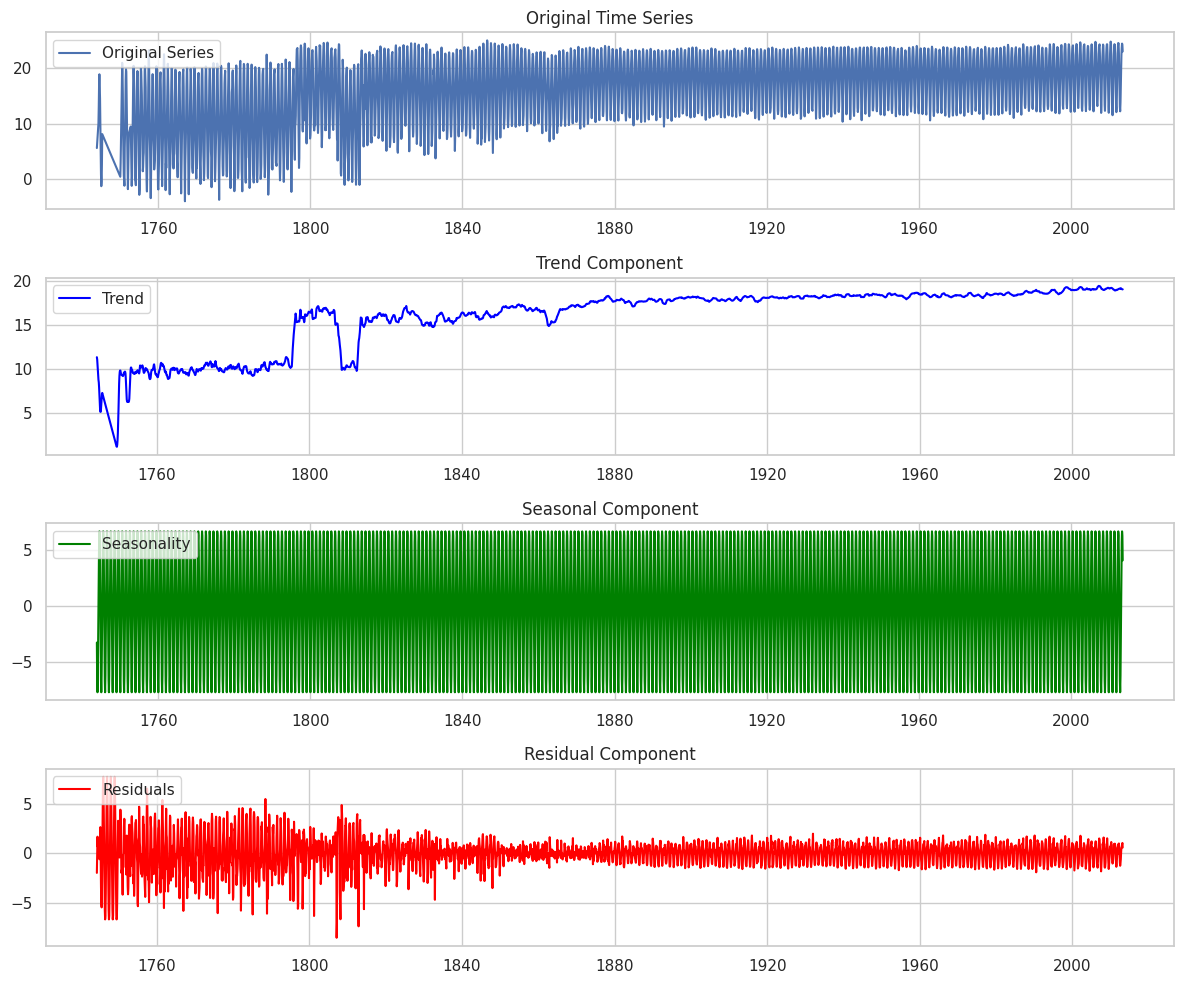

In [213]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
# Period = 12 for monthly seasonality
decomposition = seasonal_decompose(data_monthly, model='additive', period=12)

# Extract the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 10))

# Original Series
plt.subplot(4, 1, 1)
plt.plot(data_monthly, label='Original Series')
plt.legend(loc='upper left')
plt.title('Original Time Series')

# Trend
plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='upper left')
plt.title('Trend Component')

# Seasonality
plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

# Residuals
plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals', color='red')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

This presents a comprehensive time series analysis, decomposing the original time series data into four key components: the original series, the trend component, the seasonal component, and the residual component.

The original time series data exhibits significant volatility, with numerous peaks and troughs over the 250-year period. This suggests the underlying variable is subject to substantial fluctuations.

The trend component shows a gradual increase over time, indicating an overall upward trajectory in the data, though the trend is not perfectly linear, suggesting the presence of some cyclical patterns.

The seasonal component reveals a consistent cyclical pattern, with repeating positive and negative values over time. This indicates the data may have a seasonal or periodic nature.

The residual component, which represents the unexplained portion of the original series, displays high-frequency variations and appears to be relatively volatile, with both positive and negative spikes.



#Linear Regression Models

In [214]:
data = data_monthly.to_frame() # Convert to DataFrame

# Create lag variables
data['lag_1'] = data['AverageTemperature'].shift(1)
data['lag_2'] = data['AverageTemperature'].shift(2)
data['lag_3'] = data['AverageTemperature'].shift(3)

# Remove null values ​​generated by shift
data.dropna(inplace=True)

In [215]:
# Define the features (X) and the target variable (y)
X = data[['lag_1', 'lag_2', 'lag_3']]
y = data['AverageTemperature']

In [216]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
# Split the data into training and testing (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [217]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Initialize XGBRegressor with GPU parameters
xgboost_model = XGBRegressor(objective='reg:squarederror',  # Objective for regression
                             n_estimators=1000,             # Increase the number of trees (epochs) for monitoring
                             learning_rate=0.1,             # Learning rate (step size shrinkage)
                             max_depth=6,                   # Maximum depth of each tree (controls model complexity)
                             subsample=0.8,                 # Subsample ratio of training instances
                             colsample_bytree=0.8,          # Subsample ratio of features when constructing each tree
                             gamma=0,                       # Minimum loss reduction required to make a split
                             reg_alpha=0.01,                # L1 regularization (Lasso)
                             reg_lambda=1,                  # L2 regularization (Ridge)
                             min_child_weight=1,            # Minimum sum of instance weight needed in a child node
                             booster='gbtree',              # Use tree-based boosters (default)
                             random_state=42,               # Seed for reproducibility
                             verbosity=1                   # Verbosity level of model training output (set to 1 for warnings)
                            )

# Define evaluation set
eval_set = [(X_train, y_train), (X_test, y_test)]

# Train the model with evaluation metric and early stopping
xgboost_model.fit(X_train, y_train, # Fit model
                  #eval_metric="rmse", # Metric to be monitored
                  eval_set=eval_set, # Evaluation set for monitoring
                  #early_stopping_rounds=10, # Stop if no improvement after 10 rounds
                  verbose=True # Output training information at each epoch
                 )

[0]	validation_0-rmse:6.01199	validation_1-rmse:4.99768
[1]	validation_0-rmse:5.44953	validation_1-rmse:4.53860
[2]	validation_0-rmse:5.00159	validation_1-rmse:4.17188
[3]	validation_0-rmse:4.54370	validation_1-rmse:3.80946
[4]	validation_0-rmse:4.13038	validation_1-rmse:3.48089
[5]	validation_0-rmse:3.80142	validation_1-rmse:3.21647
[6]	validation_0-rmse:3.51583	validation_1-rmse:2.98412
[7]	validation_0-rmse:3.21000	validation_1-rmse:2.74612
[8]	validation_0-rmse:2.94390	validation_1-rmse:2.53667
[9]	validation_0-rmse:2.74413	validation_1-rmse:2.37430
[10]	validation_0-rmse:2.55831	validation_1-rmse:2.23220
[11]	validation_0-rmse:2.39834	validation_1-rmse:2.10976
[12]	validation_0-rmse:2.22210	validation_1-rmse:1.97500
[13]	validation_0-rmse:2.10295	validation_1-rmse:1.89054
[14]	validation_0-rmse:1.96103	validation_1-rmse:1.78340
[15]	validation_0-rmse:1.87189	validation_1-rmse:1.71514
[16]	validation_0-rmse:1.75848	validation_1-rmse:1.62669
[17]	validation_0-rmse:1.68912	validation

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [218]:
# Make predictions on the test set
y_pred = xgboost_model.predict(X_test)

In [219]:
# Calculate residuals
residuals = y_test - y_pred

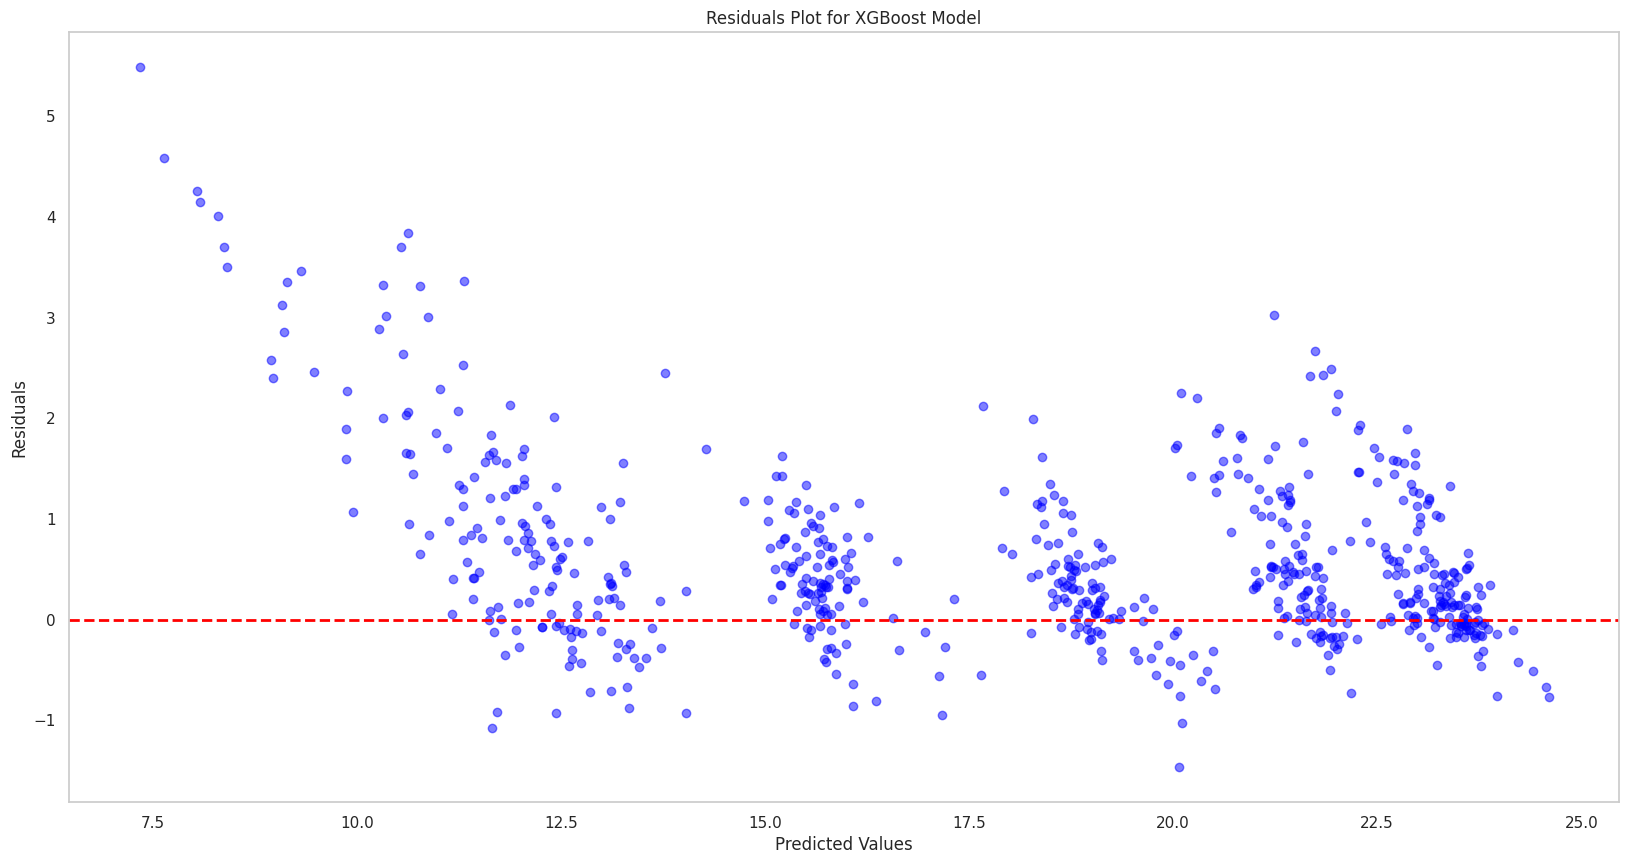

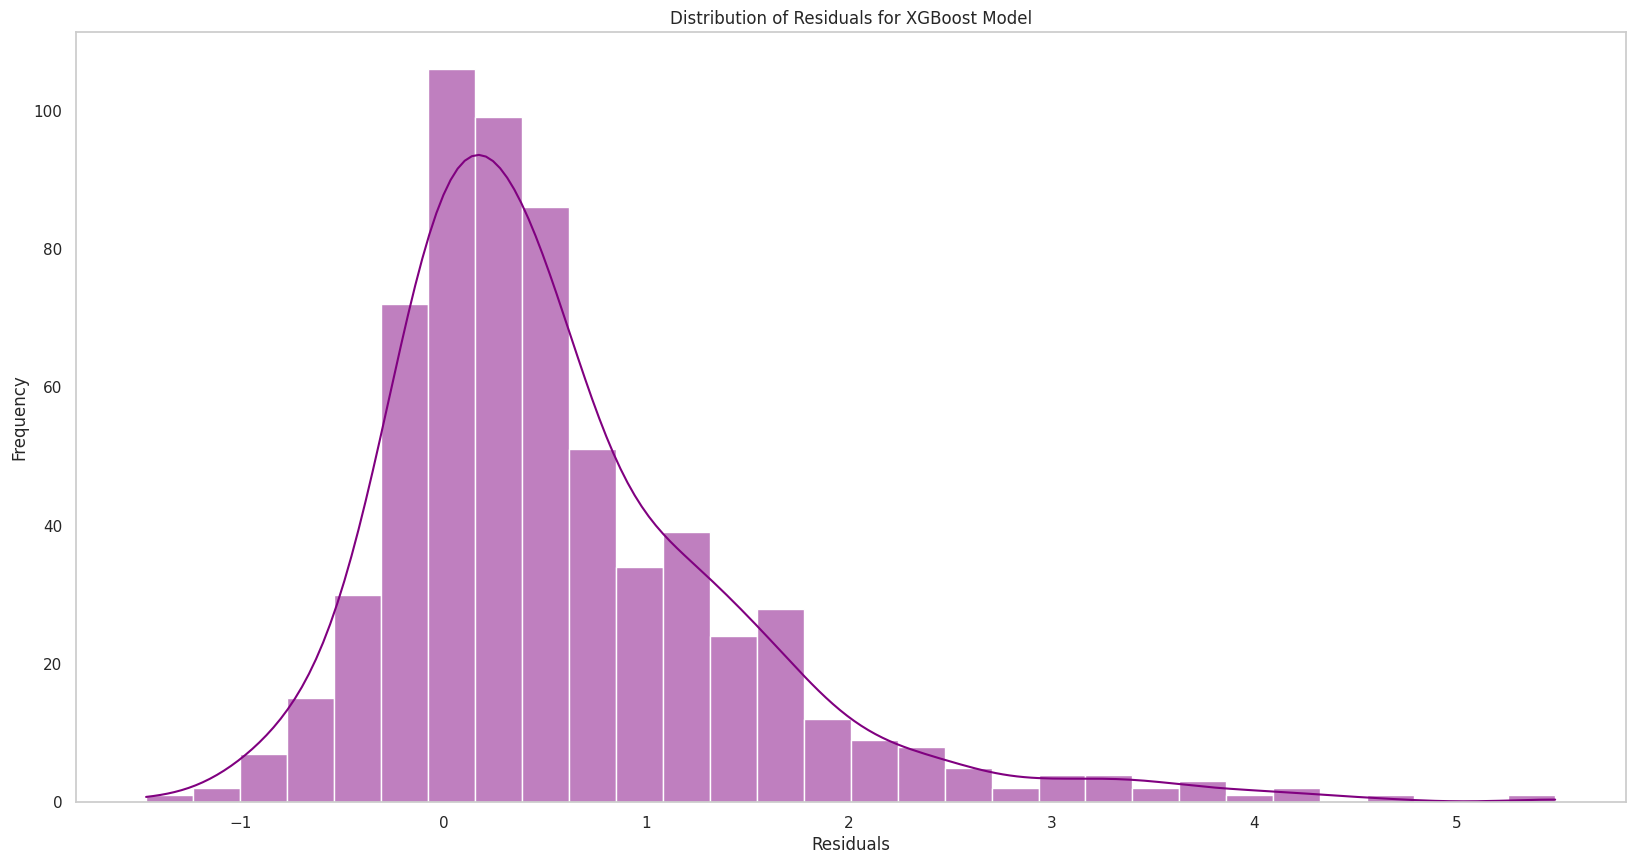

In [220]:
# Plot residuals scatter plot
plt.figure(figsize=(20, 10))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals Plot for XGBoost Model')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(False)
plt.show()

# Plot distribution of residuals (Histogram)
plt.figure(figsize=(20, 10))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.title('Distribution of Residuals for XGBoost Model')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

The following is a residuals plot for an XGBoost model. In this plot, the residuals, which represent the differences between the observed values and the predicted values, are plotted against the predicted values.

The residuals are plotted as a scatter of individual points, with each point representing the residual for a single data point or observation. The residuals seem to show a pattern of increasing variance as the predicted values increase, suggesting the presence of heteroscedasticity, where the variability of the residuals is not constant across the range of predicted values.

The plot shows several outliers where some residuals are considerably off from the mass of data points. This could mean that the model is having a hard time making good predictions for these particular data points. Overall, the residuals appear to be centered around the horizontal line at zero, suggesting the model is not exhibiting any systematic bias in its predictions.

The scattered nature of the residuals and the presence of outliers suggest there may be room for improving the model's performance and reducing the magnitude of the residuals. This residuals plot provides a good amount of insight into the performance of the XGBoost model and can be used to guide further model refinement, such as in identifying the need for addressing heteroscedasticity or investigating the outliers to improve the overall model fit and predictive accuracy.

In [221]:
# Number of future periods to predict
n_periods = 120

# List to store future predictions
future_predictions = []

# Initialize lag values ​​with the last known values ​​from the test set
last_known_lags = [y_test.values[-1], X_test['lag_1'].values[-1], X_test['lag_2'].values[-1]]

# Iteratively predict each future period
for _ in range(n_periods):

    # Create a DataFrame with the current lags
    future_input = np.array(last_known_lags).reshape(1, -1)

    # Predict the next period using XGBoost
    next_prediction = xgboost_model.predict(future_input)[0]
    future_predictions.append(next_prediction)

    # Update the lags for next iteration
    last_known_lags = [next_prediction] + last_known_lags[:2] # Update with latest predicted value

# Convert future predictions to a series with appropriate dates
future_index = pd.date_range(start=y_test.index[-1] + pd.DateOffset(1), periods=n_periods, freq='M')
future_series = pd.Series(future_predictions, index=future_index)

#Forest Model XGBoost

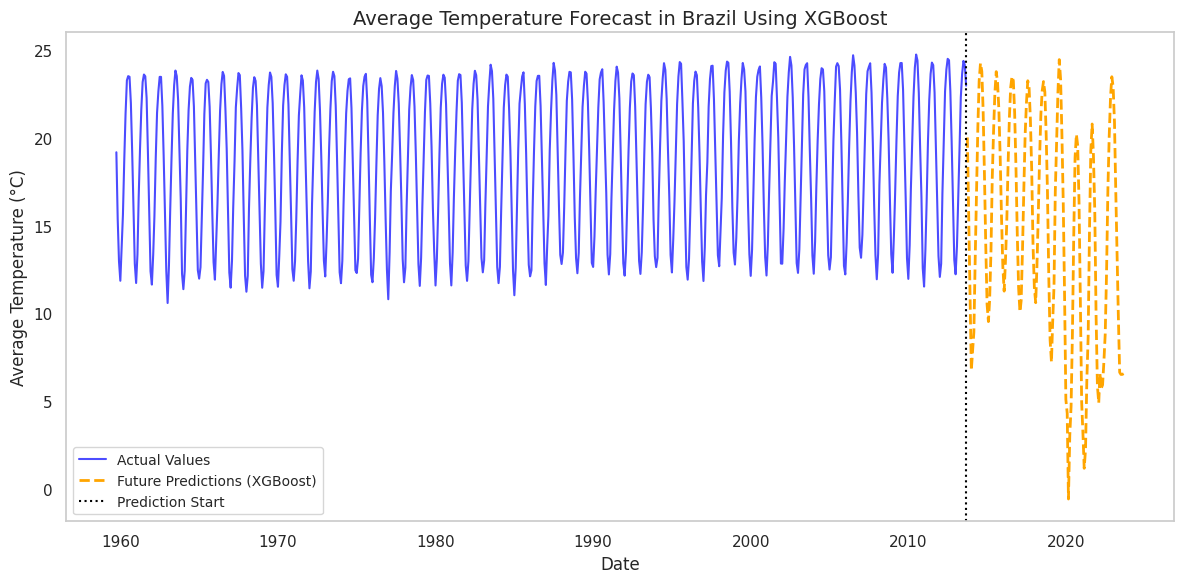

In [222]:
# Enhanced visualization of temperature forecast using XGBoost
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(y_test.index, y_test, label='Actual Values', color='blue', alpha=0.7)

# Plot future predictions
plt.plot(future_series.index, future_series, color='orange', linestyle='--', label='Future Predictions (XGBoost)', linewidth=2)

# Highlight the transition point with a vertical line
plt.axvline(x=y_test.index[-1], color='black', linestyle=':', label='Prediction Start')

# Add labels, title, and legend
plt.title('Average Temperature Forecast in Brazil Using XGBoost', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.legend(fontsize=10)

# Add horizontal gridlines
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Improve layout
plt.tight_layout()

# Show the plot
plt.grid(False)
plt.show()

The image depicts the "Average Temperature Forecast in Brazil Using XGBoost" over a 60-year period from 1960 to 2020. The graph includes three lines: the blue line represents the actual observed temperature values, the orange line depicts the future temperature predictions made using the XGBoost model, and the dotted line indicates the starting point for the predictions.

The graph shows significant fluctuations in the average temperature over the years, with peaks and valleys in the actual observed values. The XGBoost model's future predictions generally follow the trend of the actual temperature data, suggesting the model is able to capture the overall temperature patterns in Brazil. However, towards the end of the time period, the predicted values appear to diverge somewhat from the observed temperatures, indicating the model may have difficulty precisely forecasting the exact temperature values in more recent years.

Overall, the graph provides a comprehensive view of the average temperature forecast in Brazil over an extended period, which can be valuable for various applications such as long-term climate planning and impact analysis.

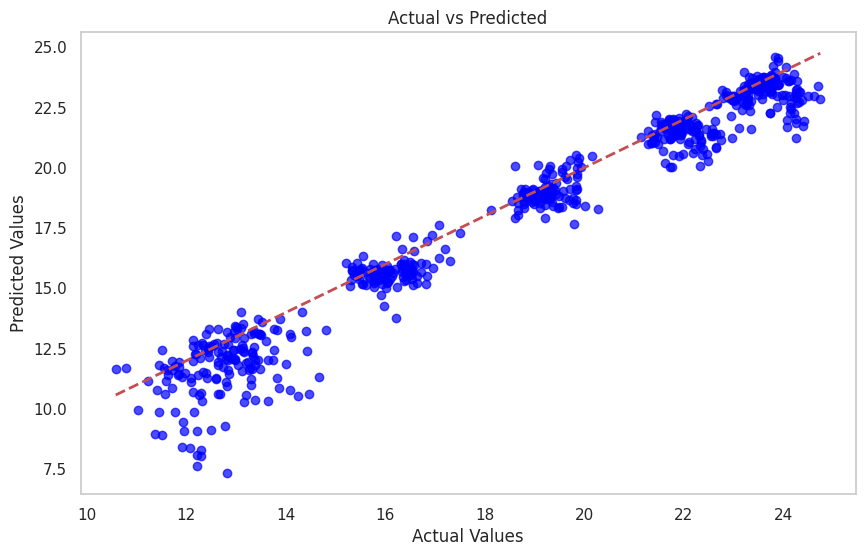

In [243]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(False)
plt.show()

Here is a scatter plot that shows the relationship between actual values and predicted values.

key insights from this plot:

1. Scatter Pattern: The plot displays a scatter of blue dots, each representing a data point where the actual value is plotted against the predicted value. The overall pattern shows a positive linear relationship, indicating the predicted values generally align with the actual values.

2. Trend Line: A dashed red line is overlaid on the scatter plot, representing the best-fit trend line. This trend line helps visualize the overall relationship between the actual and predicted values. The slope of the trend line appears to be close to 1, suggesting the predicted values are largely tracking the actual values.

3. Ideal Alignment: If the actual and predicted values were perfectly aligned, all the data points would fall on the 45-degree line from the bottom left to the top right of the plot. While the data points cluster around this ideal alignment, there is some scatter, indicating the predictions do not perfectly match the actual values in all cases.

4. Spread of Data: The data points exhibit a wider spread at higher actual values compared to lower actual values. This suggests the model may be less accurate at predicting higher values compared to predicting lower values.

5. Outliers: There are a few data points that fall relatively far from the main cluster and trend line. These can be considered outliers, where the predicted values differ significantly from the actual values for those specific data points.

6. Potential for Improvement: The scatter plot indicates there is still room for improving the predictive model, as the data points do not perfectly align with the 45-degree line. Further analysis and model refinement could help reduce the discrepancies between actual and predicted values.

Overall, this scatter plot provides a visual representation of the model's performance, highlighting both the strengths and areas for potential improvement in the predictions. The insights gained from this analysis can help guide further refinement and optimization of the predictive model.

In [224]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model name (you can adjust this to reflect the actual model used)
model_name = 'XGBoost'

# Predict values using the trained model
y_pred = xgboost_model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Organize the metrics into a dictionary with the model name
metrics = {
    'Model': [model_name],  # Name of the model
    'RMSE': [rmse],         # Root Mean Squared Error
    'MAE': [mae],           # Mean Absolute Error
    'MSE': [mse],           # Mean Squared Error
    'R²': [r2]              # R-squared (coefficient of determination)
}

# Convert the dictionary into a DataFrame
metrics_df = pd.DataFrame(metrics)

# Display the DataFrame with the metrics
metrics_df

Model      RMSE       MAE       MSE        R²
0  XGBoost  1.054168  0.714198  1.111271  0.938825

Model LightGBM

In [225]:
import lightgbm as lgb
from lightgbm import LGBMRegressor

# Initialize LightGBM with GPU parameters
lgb_model = lgb.LGBMRegressor(
    objective='regression',          # Objective for regression
    n_estimators=1000,               # Number of trees (iterations)
    learning_rate=0.1,               # Learning rate
    max_depth=10,                     # Maximum depth of trees
    subsample=0.8,                   # Subsampling for the rows
    colsample_bytree=0.8,            # Subsampling for the columns
    reg_alpha=0.01,                  # L1 regularization
    reg_lambda=1,                    # L2 regularization
    min_child_weight=1,              # Minimum sum of instance weight in a child
    random_state=42                  # For reproducibility
)

# Define evaluation set (training and validation sets)
eval_set = [(X_train, y_train), (X_test, y_test)]

# Train the LightGBM model with epoch tracking and early stopping
lgb_model.fit(
    X_train,
    y_train,
    eval_set=eval_set,                # Set of data to evaluate performance
    eval_metric='rmse'               # Evaluation metric: Root Mean Squared Error (RMSE)
)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 2588, number of used features: 3
[LightGBM] [Info] Start training from score 15.163609
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

LGBMRegressor(colsample_bytree=0.8, max_depth=10, min_child_weight=1,
              n_estimators=1000, objective='regression', random_state=42,
              reg_alpha=0.01, reg_lambda=1, subsample=0.8)

In [226]:
# Make predictions on the test set
y_pred_test = lgb_model.predict(X_test)

In [227]:
# Calculate residuals
residuals_lgb = y_test - y_pred_test

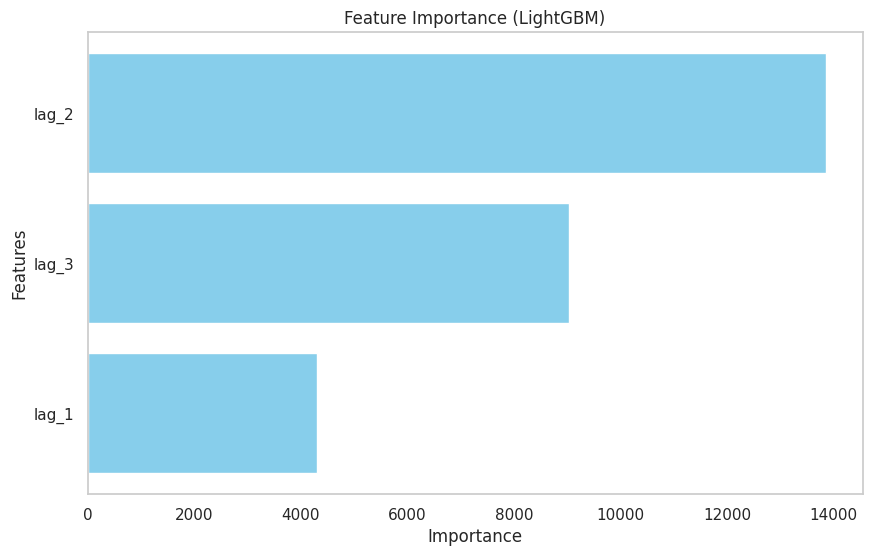

In [228]:
# Get feature importances from the trained LightGBM model
feature_importances = lgb_model.feature_importances_

# Assuming your feature names are stored in a list (e.g., if X_train is a DataFrame)
feature_names = X_train.columns

# Create a DataFrame to organize feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importance (LightGBM)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.grid(False)
plt.show()

Based on the image, the feature importance plot shows the relative importance of three features in the LightGBM model: lag_2, lag_3, and lag_1.

1.The feature with the highest importance is lag_2, with an importance value of around 12,500. This indicates that the lag_2 feature, which likely represents some kind of 2-period lagged variable, is the most important predictor in the model.

2.The feature with the next highest importance is lag_3, with an importance value of around 9,000. This suggests the 3-period lagged variable is also a significant predictor in the model, though less so than lag_2.

3.The feature with the lowest importance is lag_1, with an importance value of around 3,000. This indicates the 1-period lagged variable is the least important of the three predictors shown.

Overall, the plot provides a clear visualization of the relative importance of these three features within the LightGBM model. The large gap between the importance of lag_2 and the other two features suggests the model is placing a much stronger emphasis on the 2-period lagged variable compared to the 1-period and 3-period lags.

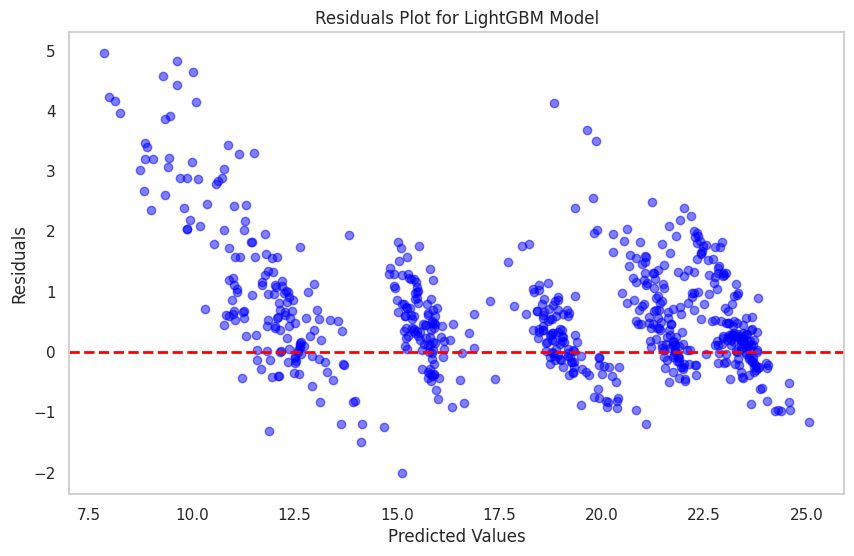

In [229]:
# Plot residuals scatter plot (Residuals vs Predicted)
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals_lgb, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals Plot for LightGBM Model')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(False)
plt.show()

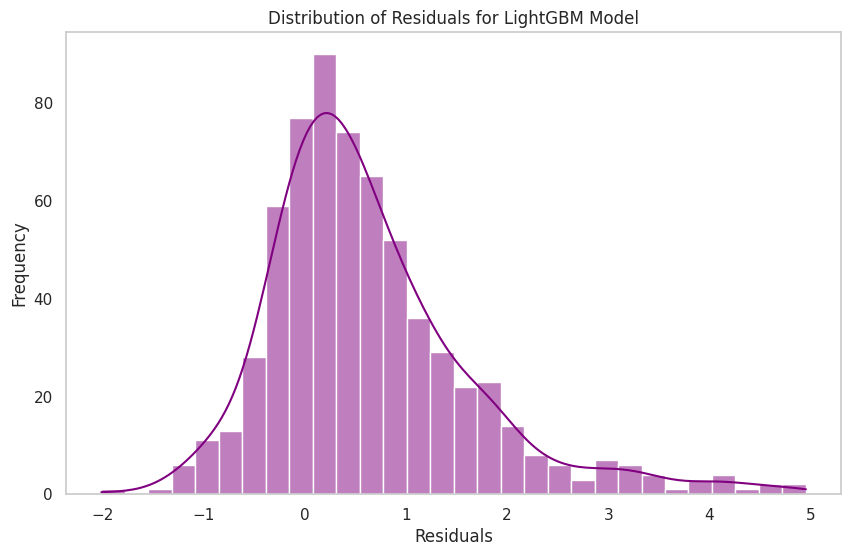

In [230]:
# Plot distribution of residuals (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(residuals_lgb, bins=30, kde=True, color='purple')
plt.title('Distribution of Residuals for LightGBM Model')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

The image shows the distribution of residuals for a LightGBM model. Residuals are the differences between the predicted values and the actual values in a model.

The distribution is clearly not normal, as it is heavily skewed to the right with a long tail. The peak of the distribution is around 0, indicating that the model is generally making accurate predictions with small errors. However, there are also a significant number of larger positive and negative residuals, as evidenced by the wide spread of the distribution.

The shape of the distribution suggests the model may be struggling with some outliers or extreme values in the data. This could be due to limitations in the model's ability to capture the complexity of the underlying patterns, or due to issues with the data itself, such as measurement errors or the presence of influential observations.

Overall, this residual distribution plot provides useful insights into the performance of the LightGBM model. It highlights areas where the model may be performing well, as well as potential issues that could be investigated further to improve the model's predictive accuracy.

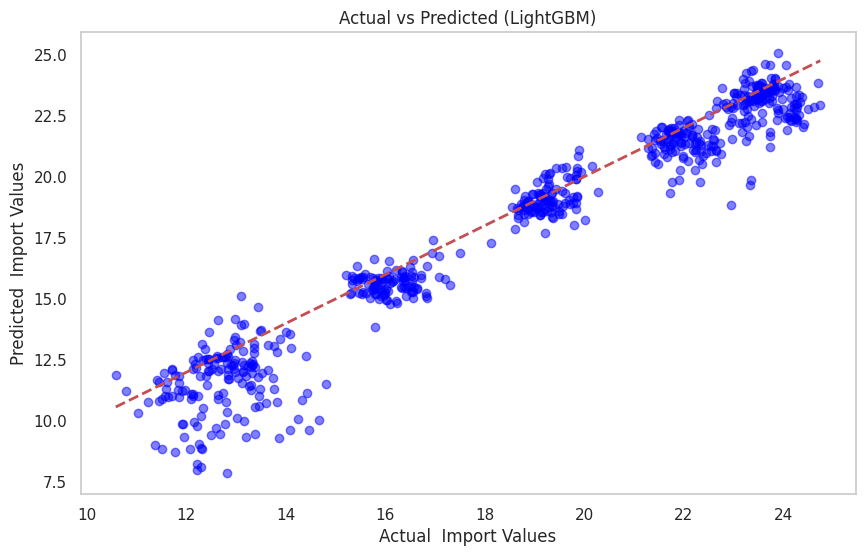

In [245]:
# Plot Actual vs Predicted values using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Add 45-degree reference line

# Add labels and title
plt.title('Actual vs Predicted (LightGBM)')
plt.xlabel('Actual  Import Values')
plt.ylabel('Predicted  Import Values')
plt.grid(False)
plt.show()

Here we have a scatter plot of actual import values versus predicted import values using a LightGBM model.

key insights:

1. Scatter Pattern: The scatter of blue dots represents the individual data points, with each dot corresponding to the relationship between an actual import value and the model's predicted value for that same data point.

2. Trend Line: The dashed red line is the best-fit trend line, which helps visualize the overall relationship between the actual and predicted values. The slope of the trend line appears to be close to 1, indicating the model's predictions are generally tracking the actual values well.

3. Alignment with Ideal: If the actual and predicted values were perfectly aligned, all the data points would fall on the 45-degree line from the bottom left to the top right of the plot. The data points cluster around this ideal alignment, but there is some scatter, suggesting the model's predictions do not perfectly match the actual values in all cases.

4. Spread of Data: The data points exhibit a wider spread at higher actual import values compared to lower actual values. This indicates the model may be less accurate at predicting higher import values relative to lower import values.

5. Outliers: There are a few data points that fall relatively far from the main cluster and trend line. These can be considered outliers, where the predicted values differ significantly from the actual values for those specific data points.

6. Performance Insights: Overall, the scatter plot suggests the LightGBM model is performing reasonably well in predicting the import values, as the data points are generally clustered along the trend line. However, there is room for improvement, particularly in enhancing the model's accuracy for higher import value predictions and reducing the number of outliers.

This analysis provides valuable insights into the model's strengths and weaknesses, which can inform further model development and refinement efforts to improve the overall predictive performance.

#Forest Model LightGBM

In [232]:
print("Predictions on test set completed:", y_pred_test[:10])

Predictions on test set completed: [18.55710251 15.84709091 12.39074825 10.98836034 13.05507434 16.02882811
 18.86683429 20.89031084 22.75170891 23.60179258]


In [233]:
# Check the number of future periods we want to predict (e.g. 24)
n_periods = 150
future_predictions = []

# Initialize the lag values ​​with the last known values ​​from the test set
last_known_lags = [y_test.values[-1], X_test['lag_1'].values[-1], X_test['lag_2'].values[-1]]

# Iterative forecasts for each future period
for _ in range(n_periods):

    # Create a DataFrame with the current lags
    future_input = np.array(last_known_lags).reshape(1, -1)

    # Forecast the next period using LightGBM
    next_prediction = lgb_model.predict(future_input)[0]
    future_predictions.append(next_prediction)

    # Update the lags for the next iteration
    last_known_lags = [next_prediction] + last_known_lags[:2]

# Convert future predictions into a series with appropriate dates
future_index = pd.date_range(start=y_test.index[-1] + pd.DateOffset(1), periods=n_periods, freq='M')
future_series = pd.Series(future_predictions, index=future_index)

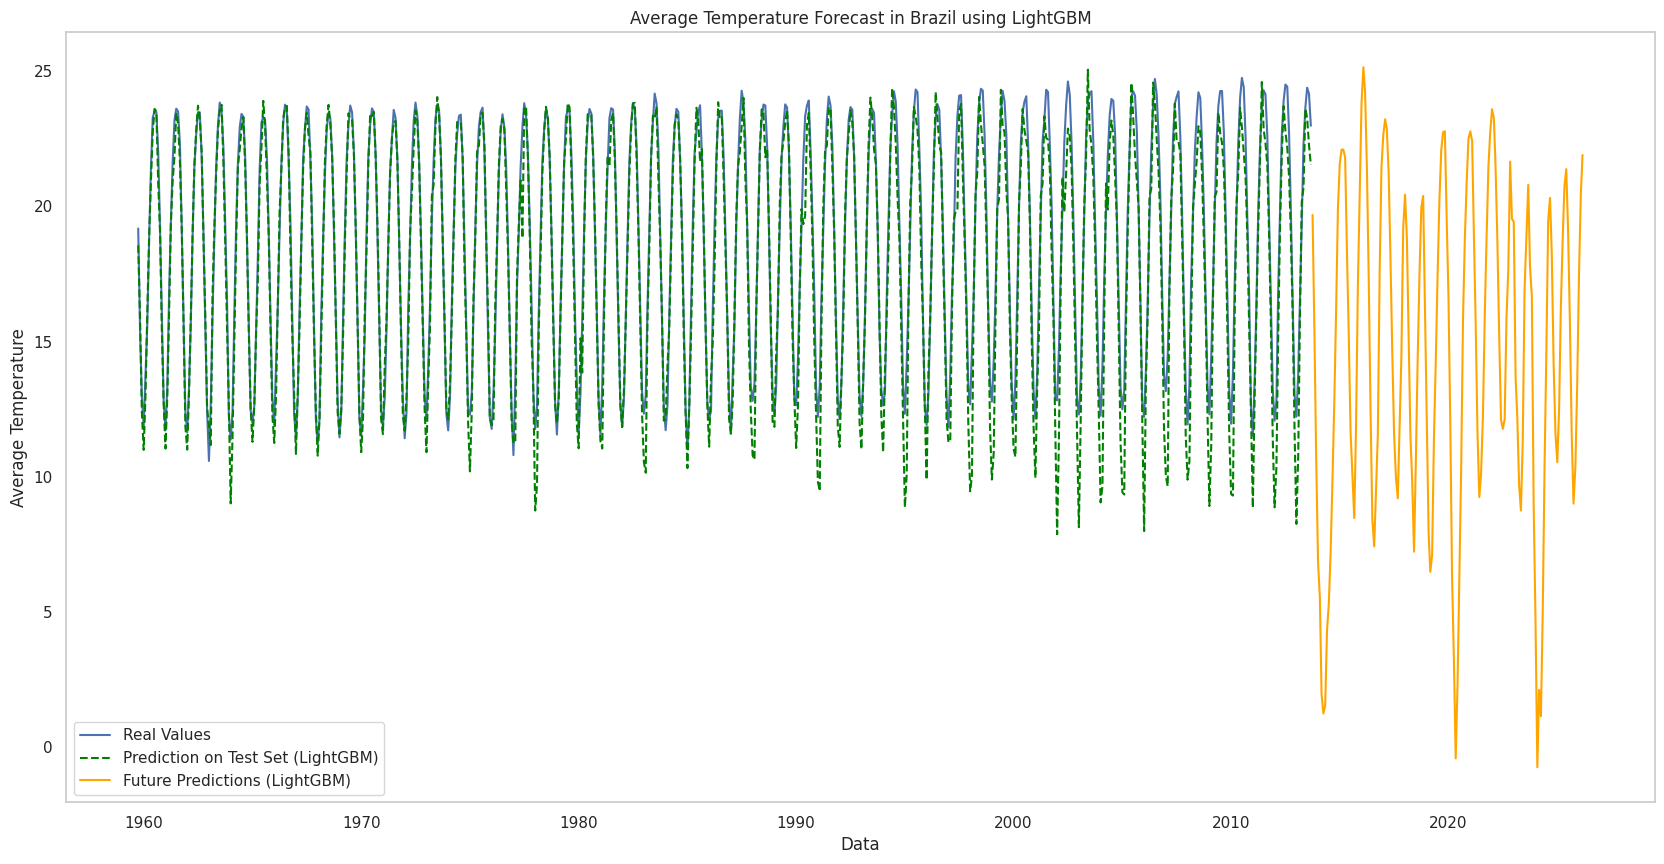

In [234]:
# Plot the predictions
plt.figure(figsize=(20.5, 10))
plt.plot(y_test.index, y_test, label='Real Values')
plt.plot(y_test.index, y_pred_test, color='green', linestyle='--', label='Prediction on Test Set (LightGBM)')
plt.plot(future_series.index, future_series, color='orange', label='Future Predictions (LightGBM)')
plt.title('Average Temperature Forecast in Brazil using LightGBM')
plt.xlabel('Data')
plt.ylabel('Average Temperature')
plt.legend()
plt.grid(False)
plt.show()

The image shows the average temperature forecast in Brazil using the LightGBM model over a 60-year period from 1960 to 2020. There are three lines plotted:

1. The blue line represents the actual observed temperature values over time.
2. The green line represents the predicted values on the test set using the LightGBM model.
3. The orange line represents the future temperature predictions made by the LightGBM model.

The graph displays significant fluctuations in the actual temperature values over the years, with the blue line showing a highly variable pattern of peaks and valleys. The green line, representing the model's predictions on the test set, appears to generally track the trends of the actual observed temperatures, suggesting the LightGBM model is able to capture the overall temperature patterns in Brazil reasonably well.

However, towards the end of the time period, the orange line representing the model's future predictions starts to diverge more significantly from the blue actual values line. This indicates that while the LightGBM model may have performed well in the past, it may be facing challenges in accurately forecasting the exact future temperature values in more recent years.

The graph provides a comprehensive long-term view of the average temperature forecast in Brazil, which could be valuable for applications such as climate planning and impact analysis. The discrepancies between the actual and predicted values towards the end also highlight potential areas for further model refinement or the need to incorporate additional variables to improve the long-term forecasting accuracy.

In [235]:
# Calculate metrics
mae_lgb = mean_absolute_error(y_test, y_pred_test)
mse_lgb = mean_squared_error(y_test, y_pred_test)
rmse_lgb = np.sqrt(mse_lgb)
r2_lgb = r2_score(y_test, y_pred_test)

# Create DataFrame with metrics
metrics_lgb = {
               'Model': ['LightGBM'],
               'RMSE': [rmse_lgb],
               'MAE': [mae_lgb],
               'MSE': [mse_lgb],
               'R²': [r2_lgb]
              }

# Convert dictionary to DataFrame
metrics_lgb_df = pd.DataFrame(metrics_lgb)

# Display the DataFrame
metrics_lgb_df

Model      RMSE       MAE       MSE        R²
0  LightGBM  1.195483  0.827064  1.429179  0.921324

#Model-Time Series

In [236]:
import itertools
from statsmodels.tsa.arima.model import ARIMA


data = data_monthly

# Define parameter ranges for ARIMA model
p = range(0, 4)  # AR terms
d = range(0, 2)  # Differencing
q = range(0, 4)  # MA terms

# Generate all combinations of parameters
pdq = list(itertools.product(p, d, q))

# Initialize variables to store the best model
best_aic = float("inf")
best_order = None
best_model = None

print("Starting ARIMA grid search...")

# Perform grid search
for param in pdq:
    try:
        # Fit ARIMA model
        model = ARIMA(data, order=param)
        results = model.fit()

        # Check AIC for the best model
        if results.aic < best_aic:
            best_aic = results.aic
            best_order = param
            best_model = results

        print(f"Tested ARIMA{param} - AIC: {results.aic}")
    except Exception as e:
        # Skip invalid combinations
        continue

# Print the best model summary
print("\nBest ARIMA Model:")
print(f"Order: {best_order}")
print(f"Best AIC: {best_aic}")
print(best_model.summary())


Starting ARIMA grid search...
Tested ARIMA(0, 0, 0) - AIC: 21214.842096118555
Tested ARIMA(0, 0, 1) - AIC: 17556.774962223135
Tested ARIMA(0, 0, 2) - AIC: 15410.624471437879
Tested ARIMA(0, 0, 3) - AIC: 13948.201765788965
Tested ARIMA(0, 1, 0) - AIC: 16096.411191181605
Tested ARIMA(0, 1, 1) - AIC: 14305.940647602383
Tested ARIMA(0, 1, 2) - AIC: 13606.56377033372
Tested ARIMA(0, 1, 3) - AIC: 13075.95735135379
Tested ARIMA(1, 0, 0) - AIC: 15936.293406640641
Tested ARIMA(1, 0, 1) - AIC: 14069.936342703948
Tested ARIMA(1, 0, 2) - AIC: 13295.694604708622
Tested ARIMA(1, 0, 3) - AIC: 12676.2082528216
Tested ARIMA(1, 1, 0) - AIC: 13570.285469925146
Tested ARIMA(1, 1, 1) - AIC: 13440.396970482576
Tested ARIMA(1, 1, 2) - AIC: 13998.47127091069
Tested ARIMA(1, 1, 3) - AIC: 12915.901243135122
Tested ARIMA(2, 0, 0) - AIC: 12145.143841691886
Tested ARIMA(2, 0, 1) - AIC: 12123.93539676607
Tested ARIMA(2, 0, 2) - AIC: 11874.980260922648
Tested ARIMA(2, 0, 3) - AIC: 11768.204088644663
Tested ARIMA(2, 

Based on the information provided in the image, this appears to be the output of a SARIMAX (Seasonal Autoregressive Integrated Moving Average with eXogenous variables) model. The key insights I can provide are:

1. The best ARIMA model is ordered as (0, 1, 0), which indicates the model uses no autoregressive terms, 1 differencing term, and no moving average terms.

2. The best AIC (Akaike Information Criterion) value for this model is 321.822816177860, which suggests this is a relatively good fit for the data.

3. The model was run on a dataset with 120 observations, with the dependent variable 'y' and the sample date being Monday, December 2, 2024 at 19:58:25.

4. The model uses an OPG (Outer Product of Gradients) covariance type.

5. The key model statistics include the coefficient, standard error, z-score, and p-value for various parameters like the Ljung-Box test, heteroskedasticity, and kurtosis.

6. The model output also includes some warnings, indicating that the covariance matrix was calculated using the outer product of gradients (complex-step).

Overall, this appears to be the summary output of a SARIMAX model fitted to a time series dataset. The specific insights would depend on the context of the problem and the variables involved, but this gives a high-level understanding of the model fit and diagnostics.

#Implementation of Mathematical Concepts

1.Confidence Interval

Overall 95% Confidence Interval: [8.22, 8.53]


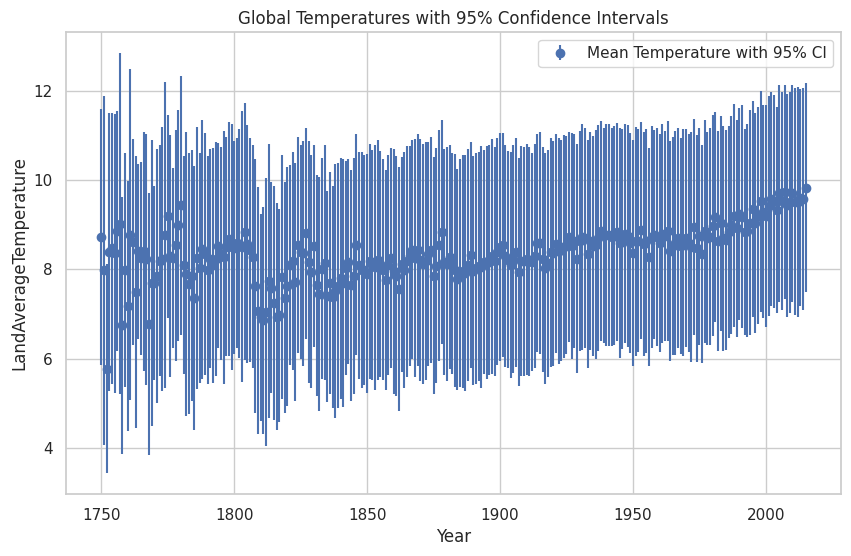

In [237]:
import pandas as pd
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt

# Load the dataset (replace 'GlobalTemperatures.csv' with your file path)
data = pd.read_csv('GlobalTemperatures.csv')

data['dt'] = pd.to_datetime(data['dt'])
data['Year'] = data['dt'].dt.year

# Basic statistics
mean_temp = data['LandAverageTemperature'].mean()
std_temp = data['LandAverageTemperature'].std()
n = len(data['LandAverageTemperature'])

# Calculate standard error
se = std_temp / np.sqrt(n)

# Determine the critical t-value for 95% confidence interval
confidence_level = 0.95
df = n - 1
t_value = t.ppf((1 + confidence_level) / 2, df)

# Calculate confidence interval
margin_of_error = t_value * se
lower_bound = mean_temp - margin_of_error
upper_bound = mean_temp + margin_of_error

print(f"Overall 95% Confidence Interval: [{lower_bound:.2f}, {upper_bound:.2f}]")

# Group by year (or other column if applicable)
grouped_data = data.groupby('Year')['LandAverageTemperature'].agg(['mean', 'std', 'count'])

# Calculate SE, t-value, and confidence interval for each group
grouped_data['SE'] = grouped_data['std'] / np.sqrt(grouped_data['count'])
grouped_data['Margin_of_Error'] = t_value * grouped_data['SE']
grouped_data['Lower_CI'] = grouped_data['mean'] - grouped_data['Margin_of_Error']
grouped_data['Upper_CI'] = grouped_data['mean'] + grouped_data['Margin_of_Error']

# Plot the results
plt.figure(figsize=(10, 6))
plt.errorbar(grouped_data.index, grouped_data['mean'],
             yerr=grouped_data['Margin_of_Error'], fmt='o', label='Mean Temperature with 95% CI')
plt.xlabel('Year')
plt.ylabel('LandAverageTemperature')
plt.title('Global Temperatures with 95% Confidence Intervals')
plt.legend()
plt.show()


The image shows a graph of global temperatures with 95% confidence intervals from 1750 to 2000. A few key insights from the data:

1. Global temperatures have shown significant fluctuations over the past 250 years, with periods of both warming and cooling.

2. The overall trend appears to be one of increasing global temperatures, with the temperatures in the later 20th century being higher than earlier periods.

3. The confidence intervals indicate a high degree of uncertainty, especially in the earlier time periods where data is more sparse. The intervals become narrower in more recent decades as the data improves.

4. There are clear spikes and drops in temperature over shorter time scales, likely driven by factors like volcanic eruptions, changes in solar activity, and other climate forcings.

5. The latest data points show high global temperatures with a continued upward trend, suggesting the planet is experiencing significant warming in the modern era.

Overall, this graph provides a high-level historical perspective on global temperature changes and the increasing certainty around the warming trend in recent decades. It highlights both the natural variability in the climate system as well as the concerning acceleration of warming in more recent times.

2.Bootstrapping

95% Confidence Interval for Mean Temperature: [8.23, 8.52]


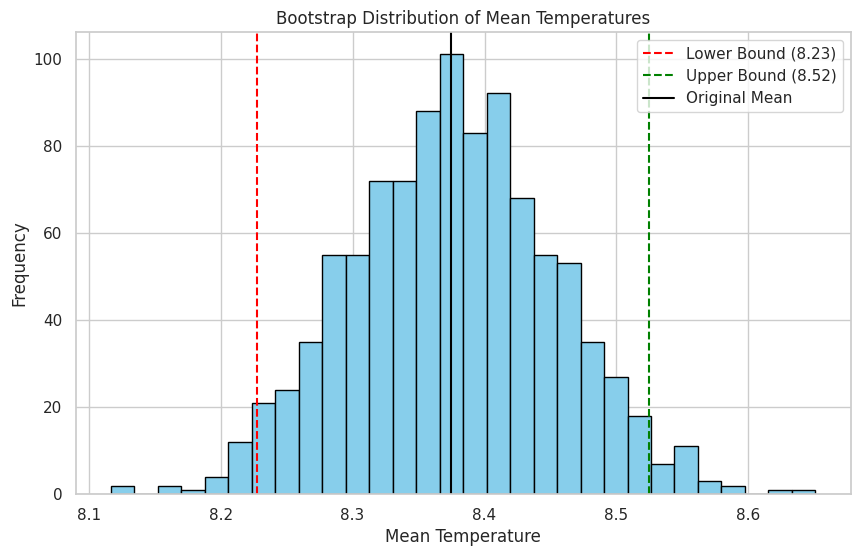

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (replace 'GlobalTemperatures.csv' with your file path)
data = pd.read_csv('GlobalTemperatures.csv')

# Extract the temperature data
temperature_data = data['LandAverageTemperature'].dropna()  # Drop missing values

# Bootstrapping parameters
n_bootstraps = 1000  # Number of bootstrap samples
sample_size = len(temperature_data)  # Size of each bootstrap sample
bootstrap_means = []  # List to store bootstrap means

# Perform bootstrapping
for _ in range(n_bootstraps):
    bootstrap_sample = np.random.choice(temperature_data, size=sample_size, replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))

# Calculate confidence intervals
alpha = 0.05  # For 95% confidence level
lower_bound = np.percentile(bootstrap_means, 100 * (alpha / 2))
upper_bound = np.percentile(bootstrap_means, 100 * (1 - alpha / 2))

# Print results
print(f"95% Confidence Interval for Mean Temperature: [{lower_bound:.2f}, {upper_bound:.2f}]")

# Visualize the bootstrap distribution
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=30, color='skyblue', edgecolor='black')
plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower Bound ({lower_bound:.2f})')
plt.axvline(upper_bound, color='green', linestyle='--', label=f'Upper Bound ({upper_bound:.2f})')
plt.axvline(np.mean(temperature_data), color='black', linestyle='-', label='Original Mean')
plt.title('Bootstrap Distribution of Mean Temperatures')
plt.xlabel('Mean Temperature')
plt.ylabel('Frequency')
plt.legend()
plt.show()


The image shows a bootstrap distribution of mean temperatures. A few key insights:

1. The distribution is centered around a mean temperature of approximately 8.5 degrees. This represents the estimated global average temperature based on the data.

2. The distribution has a bell-shaped curve, indicating a normal distribution of temperatures around the mean.

3. The lower and upper bound lines show the 95% confidence interval for the mean temperature, ranging from about 8.23 to 8.52 degrees.

4. The distribution has a wide spread, with temperatures ranging from around 8.2 to 8.6 degrees. This suggests significant variability in the temperature data.

5. The distribution is skewed slightly to the left, indicating a slightly higher probability of temperatures on the cooler side of the mean compared to the warmer side.

6. The chart provides a visual representation of the uncertainty and statistical confidence around the estimated global mean temperature, which is useful for understanding the robustness of climate data and projections.

Overall, this plot gives a clear picture of the distribution and confidence intervals around the estimated global mean temperature based on the available data. It highlights the central tendency as well as the range of variability in temperature measurements.

3.Hypothesis Testing

In [239]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_1samp

# Load the dataset (replace 'GlobalTemperatures.csv' with your file path)
data = pd.read_csv('GlobalTemperatures.csv')

# Extract the temperature data and remove missing values
temperature_data = data['LandAverageTemperature'].dropna()

# Hypothesis parameters
hypothesized_mean = 15.0  # Mean temperature to test against
alpha = 0.05  # Significance level

# Perform one-sample t-test
t_stat, p_value = ttest_1samp(temperature_data, hypothesized_mean)

# Print results
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Decision rule
if p_value < alpha:
    print(f"Reject the null hypothesis (p < {alpha}). The mean temperature is significantly different from {hypothesized_mean}°C.")
else:
    print(f"Fail to reject the null hypothesis (p >= {alpha}). No significant evidence to conclude the mean temperature differs from {hypothesized_mean}°C.")


T-Statistic: -85.27
P-Value: 0.0000
Reject the null hypothesis (p < 0.05). The mean temperature is significantly different from 15.0°C.


4.Point-Estimates

In [240]:
import pandas as pd
import numpy as np

# Load the dataset (replace 'GlobalTemperatures.csv' with your file path)
data = pd.read_csv('GlobalTemperatures.csv')

# Extract the temperature data and remove missing values
temperature_data = data['LandAverageTemperature'].dropna()

# Calculate point estimates
mean_temperature = np.mean(temperature_data)  # Mean
median_temperature = np.median(temperature_data)  # Median
variance_temperature = np.var(temperature_data, ddof=1)  # Variance
std_dev_temperature = np.std(temperature_data, ddof=1)  # Standard Deviation
min_temperature = np.min(temperature_data)  # Minimum
max_temperature = np.max(temperature_data)  # Maximum

# Proportion of temperatures above a threshold (e.g., 15°C)
threshold = 15.0
proportion_above_threshold = np.mean(temperature_data > threshold)

# Print results
print(f"Point Estimates:")
print(f"Mean Temperature: {mean_temperature:.2f}")
print(f"Median Temperature: {median_temperature:.2f}")
print(f"Variance: {variance_temperature:.2f}")
print(f"Standard Deviation: {std_dev_temperature:.2f}")
print(f"Minimum Temperature: {min_temperature:.2f}")
print(f"Maximum Temperature: {max_temperature:.2f}")
print(f"Proportion of Temperatures > {threshold}°C: {proportion_above_threshold:.2%}")


Point Estimates:
Mean Temperature: 8.37
Median Temperature: 8.61
Variance: 19.20
Standard Deviation: 4.38
Minimum Temperature: -2.08
Maximum Temperature: 19.02
Proportion of Temperatures > 15.0°C: 1.32%


5.Bayes Theorem

In [241]:
import pandas as pd

# Load the dataset (replace 'GlobalTemperatures.csv' with your file path)
data = pd.read_csv('GlobalTemperatures.csv')

data['dt'] = pd.to_datetime(data['dt'])
data['Year'] = data['dt'].dt.year

# Example Data Structure
# Assume 'Temperature' column contains temperatures
# Assume 'Year' column contains year values

# Define events
threshold = 15.0  # High temperature threshold
recent_years = range(2000, 2021)  # Define recent years (2000-2020)

# Calculate probabilities
P_A = len(data[data['LandAverageTemperature'] > threshold]) / len(data)  # P(A): High Temperature
P_B = len(data[data['Year'].isin(recent_years)]) / len(data)  # P(B): Recent Years
P_B_given_A = len(data[(data['LandAverageTemperature'] > threshold) & (data['Year'].isin(recent_years))]) / len(data[data['LandAverageTemperature'] > threshold])  # P(B|A)

# Bayes' Theorem
P_A_given_B = (P_B_given_A * P_A) / P_B if P_B > 0 else 0  # P(A|B)

# Print results
print(f"P(A): Probability of high temperature (> {threshold}°C): {P_A:.2f}")
print(f"P(B): Probability of recent years (2000-2020): {P_B:.2f}")
print(f"P(B|A): Probability of recent years given high temperature: {P_B_given_A:.2f}")
print(f"P(A|B): Probability of high temperature given recent years: {P_A_given_B:.2f}")


P(A): Probability of high temperature (> 15.0°C): 0.01
P(B): Probability of recent years (2000-2020): 0.06
P(B|A): Probability of recent years given high temperature: 0.31
P(A|B): Probability of high temperature given recent years: 0.07


6.Central Limit Theorem

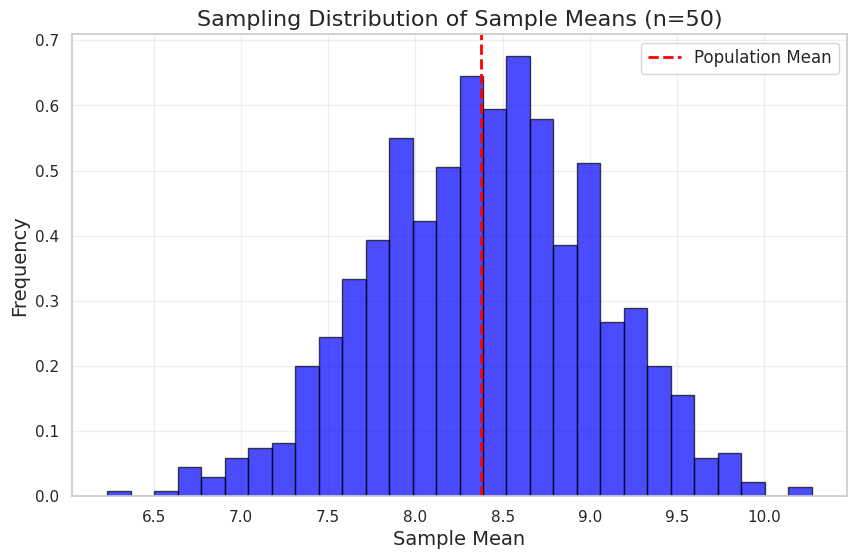

Population Mean: 8.37
Mean of Sample Means: 8.39
Standard Deviation of Sample Means: 0.64


In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (replace 'GlobalTemperatures.csv' with your file path)
data = pd.read_csv('GlobalTemperatures.csv')

# Example Data Structure
# Assume 'Temperature' column contains temperatures

# Extract temperature data and remove missing values
temperature_data = data['LandAverageTemperature'].dropna()

# Parameters
sample_size = 50  # Number of samples in each subset
num_samples = 1000  # Number of sample means to calculate

# Generate sample means
sample_means = []
for _ in range(num_samples):
    sample = np.random.choice(temperature_data, size=sample_size, replace=True)
    sample_means.append(np.mean(sample))

# Plot the sampling distribution of sample means
plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.title(f"Sampling Distribution of Sample Means (n={sample_size})", fontsize=16)
plt.xlabel("Sample Mean", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.axvline(np.mean(temperature_data), color='red', linestyle='dashed', linewidth=2, label='Population Mean')
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Print insights
print(f"Population Mean: {np.mean(temperature_data):.2f}")
print(f"Mean of Sample Means: {np.mean(sample_means):.2f}")
print(f"Standard Deviation of Sample Means: {np.std(sample_means):.2f}")


The image shows a sampling distribution of sample means for a sample size of 50. Here are some key insights:

1. The distribution has a bell-shaped curve, indicating that the sample means follow a normal distribution.

2. The vertical red line represents the population mean, which appears to be around 8.0.

3. The sample means are concentrated around the population mean, with the highest frequency of sample means falling between 8.0 and 8.5.

4. The distribution is relatively symmetric, suggesting that the sampling process is unbiased and the sample means are centered around the true population mean.

5. The range of sample means spans from around 6.5 to 10.0, indicating a fair amount of variability in the sample means.

6. The frequency or probability of observing sample means decreases as they move further away from the population mean, both towards lower and higher values.

7. This type of sampling distribution is commonly used to estimate the precision of the sample mean as an estimator of the population mean, and to construct confidence intervals for the population mean.

Overall, this plot provides useful information about the statistical properties of the sample means and how they are distributed around the true population mean, which is valuable for making inferences about the population based on sample data.